<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Gestión de Outliers

AutoRenew, la empresa líder en la venta de coches de segunda mano, sigue adelante con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Este modelo es clave para mejorar las estrategias de ventas, marketing y optimización del inventario de la empresa. Ya has realizado un análisis exploratorio inicial y gestionado los valores nulos en el conjunto de datos. Ahora, es el momento de abordar otro aspecto crucial del preprocesamiento: la **gestión de outliers**.

En este laboratorio, te enfocarás en identificar y gestionar los outliers (valores atípicos) presentes en el conjunto de datos. Los outliers pueden distorsionar los resultados de un análisis y afectar negativamente el rendimiento de los modelos predictivos, por lo que es fundamental tratarlos adecuadamente antes de proceder con las siguientes fases del proyecto.


**Instrucciones:**

1. **Identificación de Outliers:** Explora las columnas clave del conjunto de datos (como `price`, `powerCV`, `kilometer`, etc.) para identificar posibles outliers. Utiliza gráficos como diagramas de caja (boxplots) y análisis estadísticos para detectar valores que se desvíen significativamente del resto de los datos.

2. **Análisis de Outliers:** Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos válidos o resultados de condiciones específicas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores atípicos.

3. **Gestión de Outliers:** Decide la estrategia más adecuada para manejar los outliers. Esto podría incluir la eliminación de los outliers, la transformación de los datos, o la aplicación de técnicas de imputación. Justifica tu elección basándote en cómo los outliers podrían afectar el modelo predictivo.

**Nota:** Recuerda que este laboratorio es parte de una serie de actividades en las que utilizarás el mismo conjunto de datos a lo largo de la semana. Documenta cuidadosamente los pasos que sigas para que puedas referirte a ellos en las próximas etapas del proyecto.


In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [3]:
from src import soporte_outlayers as so

In [4]:
df = pd.read_csv("datos/robust.csv",index_col=0)

In [5]:
df.head()

price  powerCV_robust  kilometer_robust
0    480.0       -0.369107               0.0
1  18300.0        1.123815              -1.0
2   9800.0        0.744345              -1.0
3   1500.0       -0.525420               0.0
4   3600.0       -0.612990              -2.4

Los datos de las columnas de powerCV_robust y kilometer_robust están escalados con RobustScaler

### Identificación de outliers

Para comenzar la identificación de outliers, sacamos boxplot de las tres variables para ver sus distribuciones 

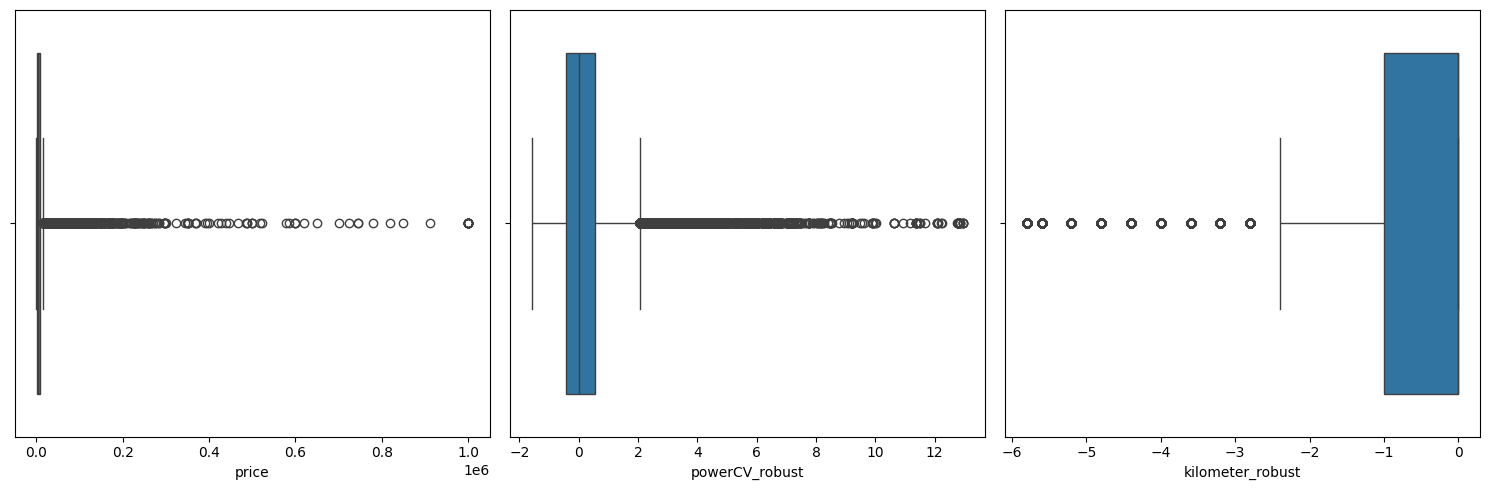

In [6]:
fig , axes = plt.subplots(nrows=1 , ncols=3, figsize = (15, 5) )

sns.boxplot(x="price", data=df, ax=axes[0])
sns.boxplot(x="powerCV_robust", data=df, ax=axes[1])
sns.boxplot(x="kilometer_robust", data=df, ax=axes[2])

plt.tight_layout()


Las gráficas nos sirven para visualizar los outliers pero no nos permiten situar con precisión ni la cantidad ni la posición de los mismos

Vamos a extraer analiticamente los outliers univariados más información sobr los outlayers

In [7]:
so.describe_outlayers(df)

columna  n_outlayers  limite_inf   limite_sup  %_outlayers
2  kilometer_robust        64221    -2.50000      1.50000        17.29
0             price        28098 -7725.00000  16315.00000         7.56
1    powerCV_robust        12497    -1.94539      2.05461         3.36

Con este metodo hemos identificado outliers con el metodo IQR. El método z-score no procede en este caso pues nuestros datos tienen una distribución alejada de la de la normal.

Pasamos a los outliers multivariados

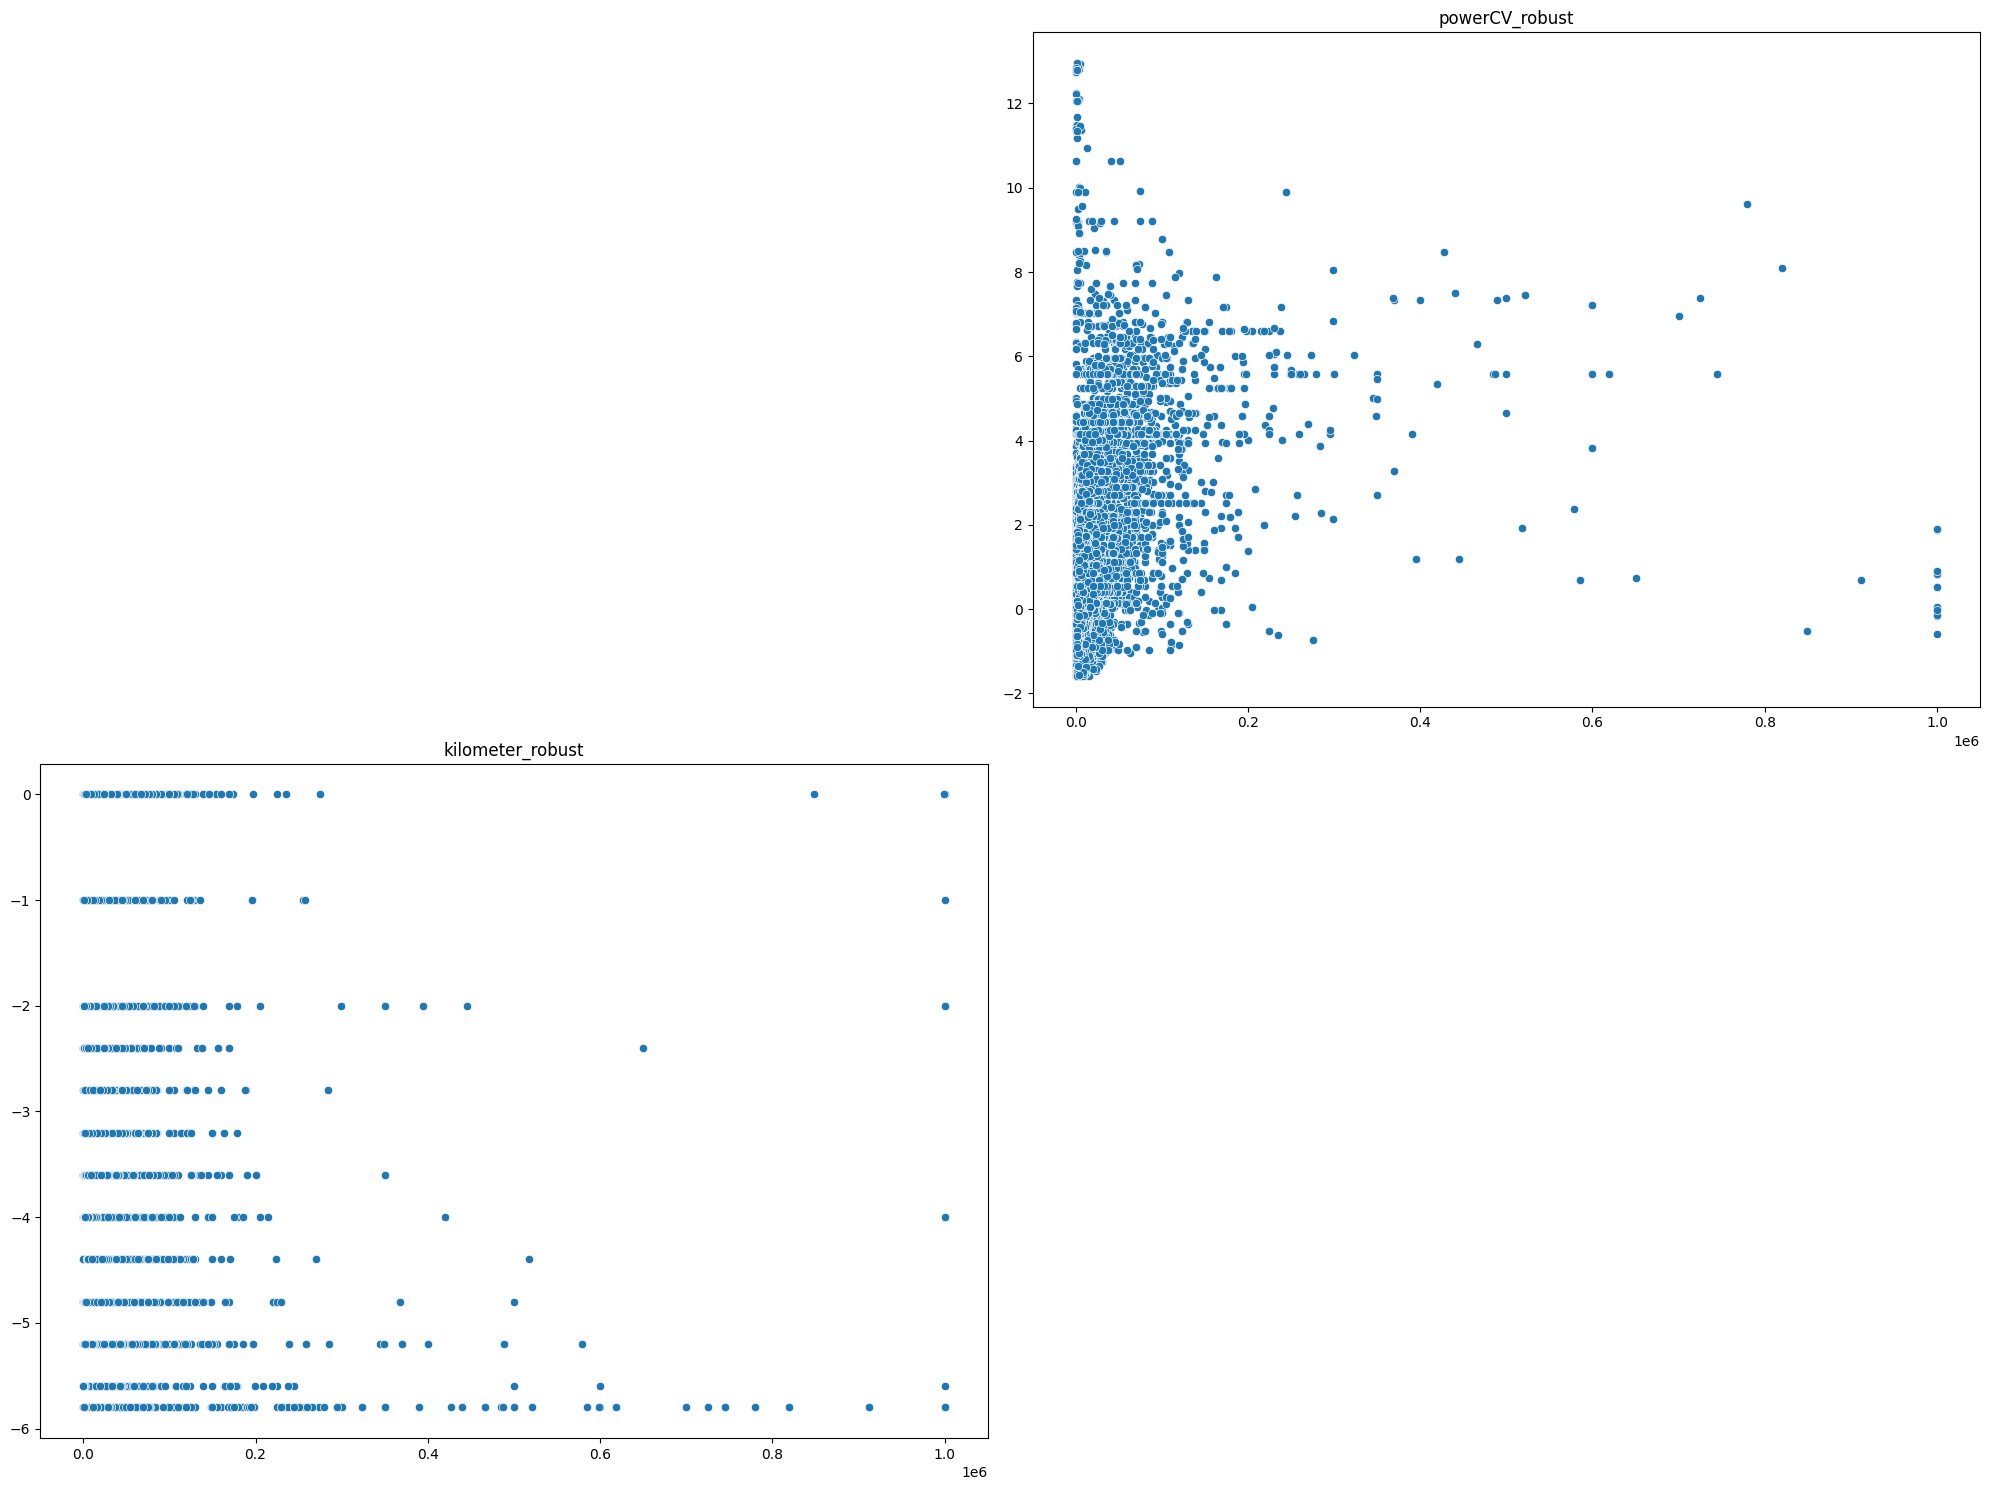

In [8]:
# instanciamos la clase de indentificación de Outliers Multivariados. En este caso usamos las funciones definidas en los apuntes
gestion_multi= so.GestionOutliersMultivariados(df)

# llamamos al método que nos permite identificar los outliers
gestion_multi.visualizar_outliers_bivariados("price")

Los diagramas de dispersión visualizan muy bien los *outliers* pero no los identifican en el conjunto de datos

Vamos a usar el metodo LOF para detectar los outliers multivariados, para 2 y 5 vecinos

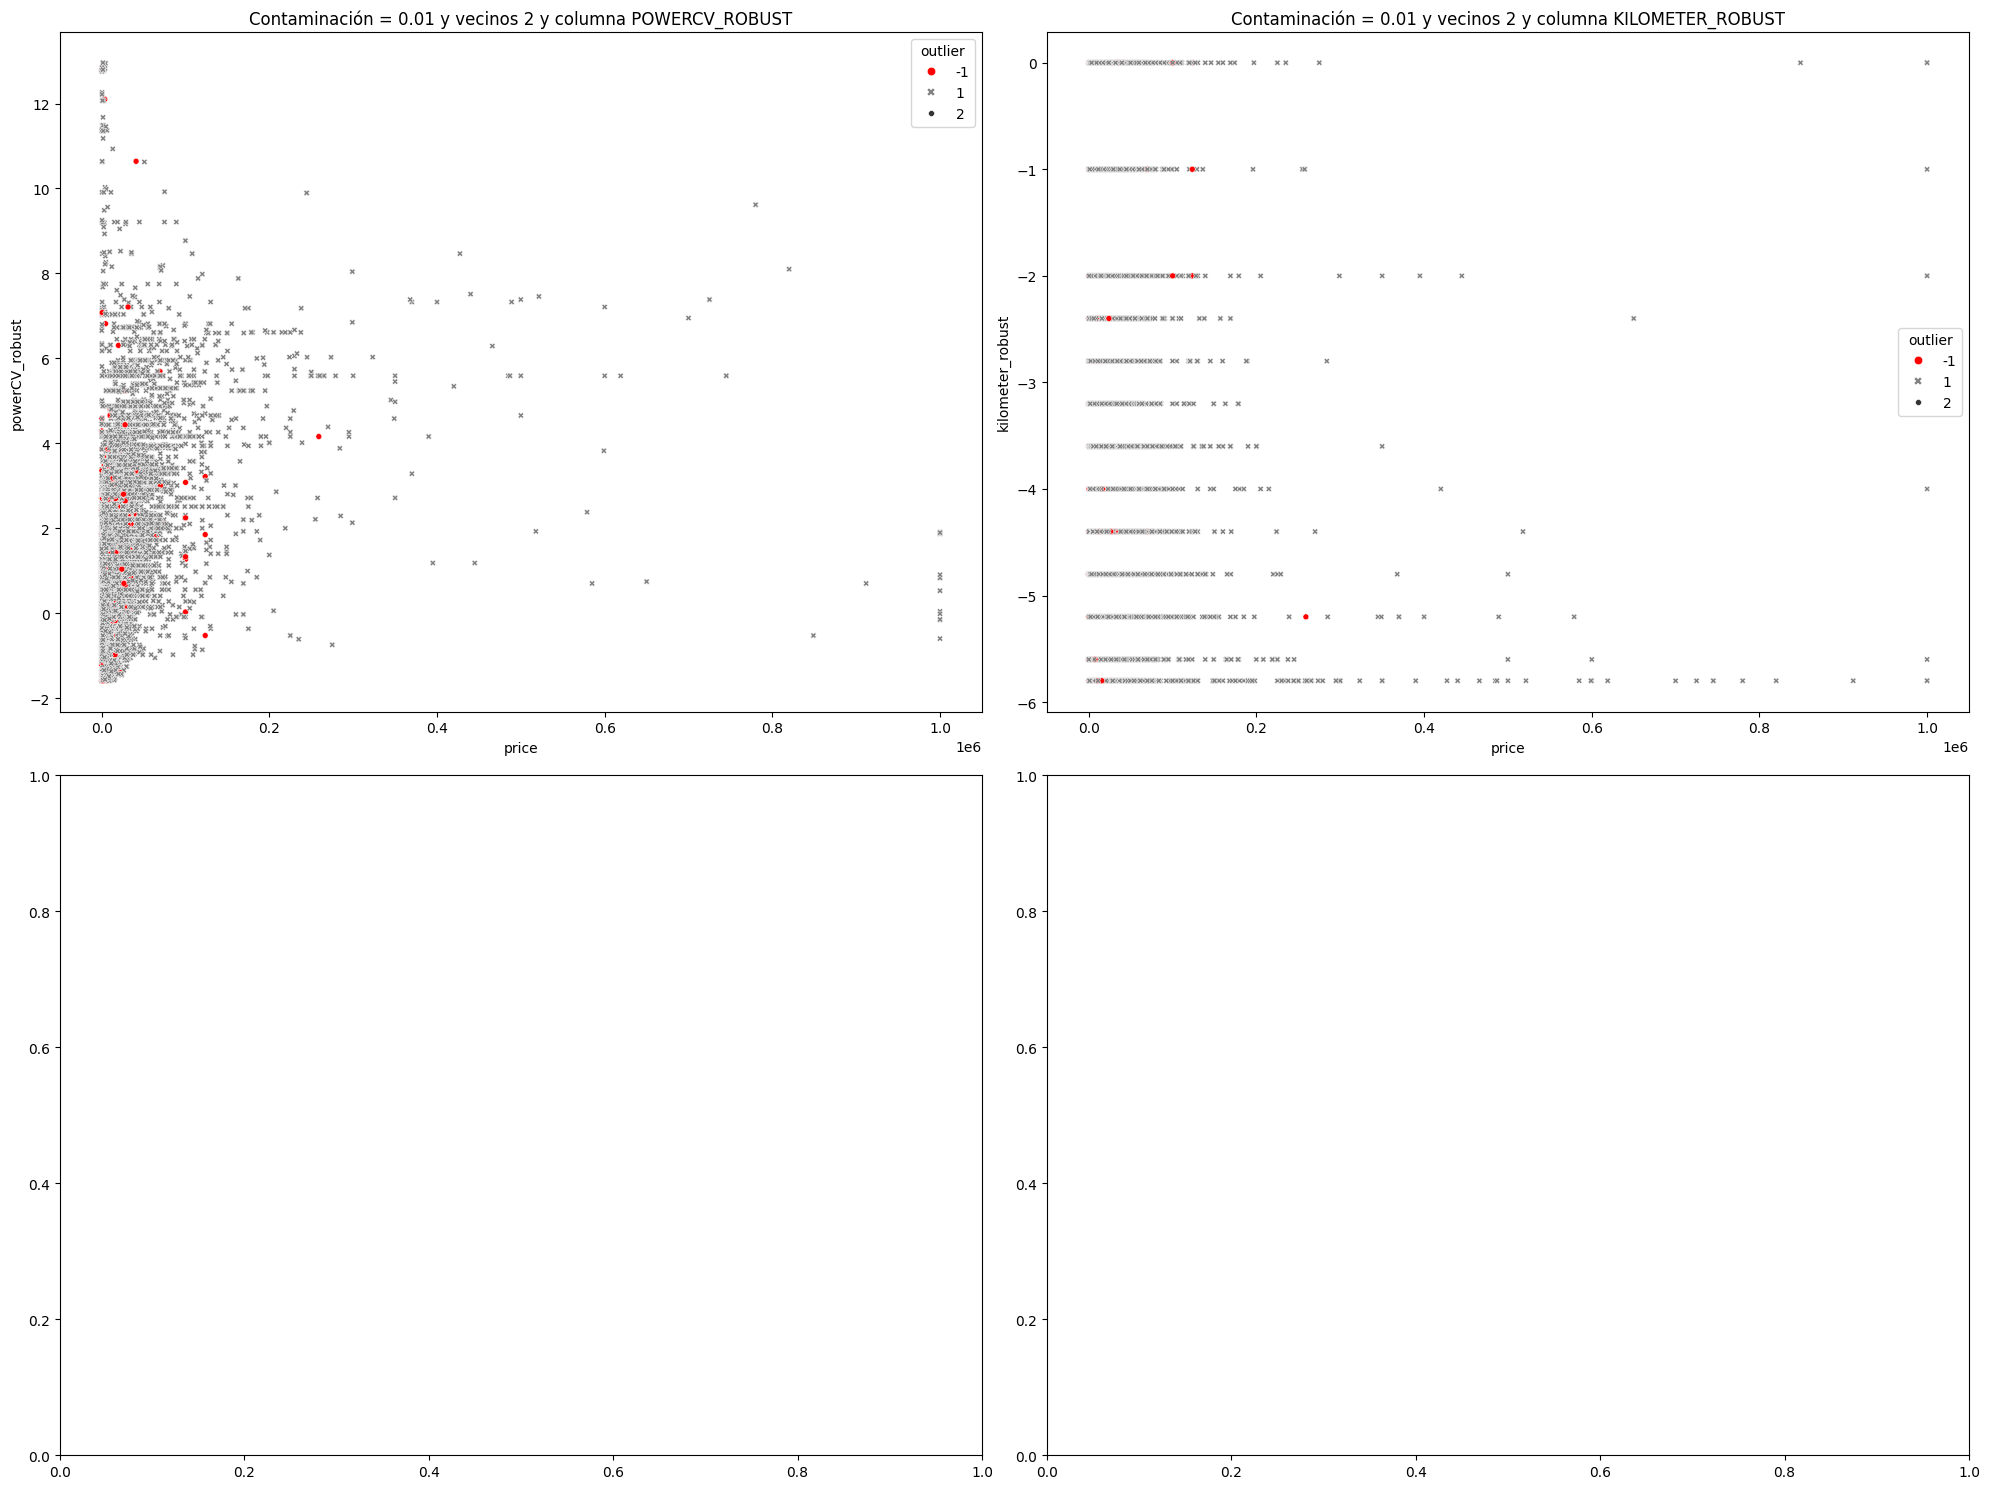

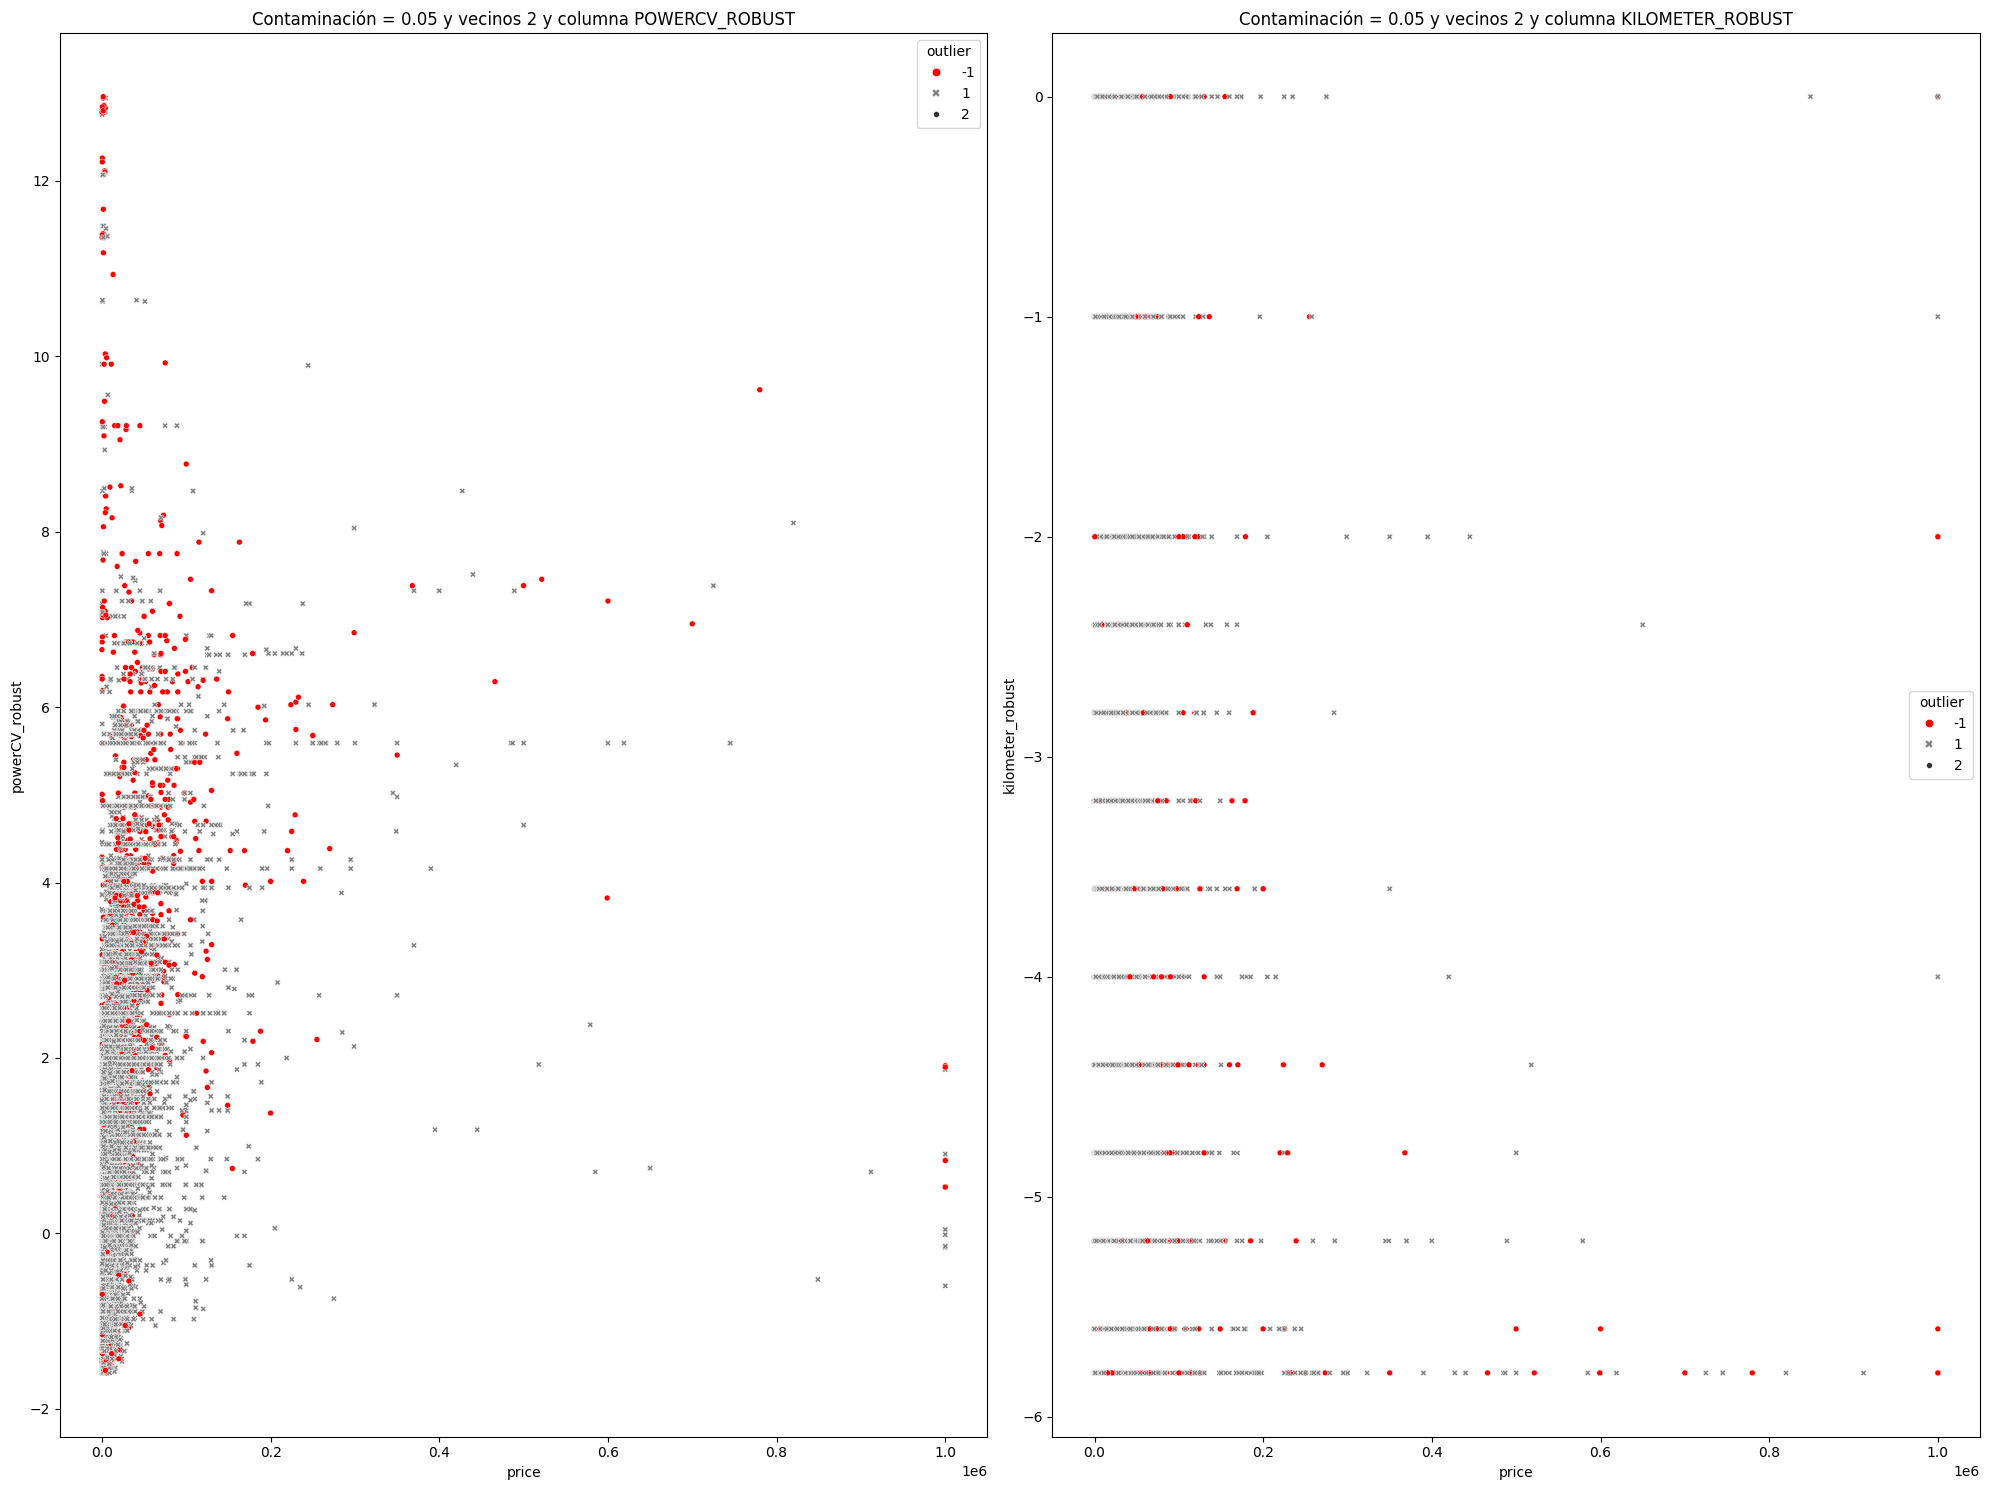

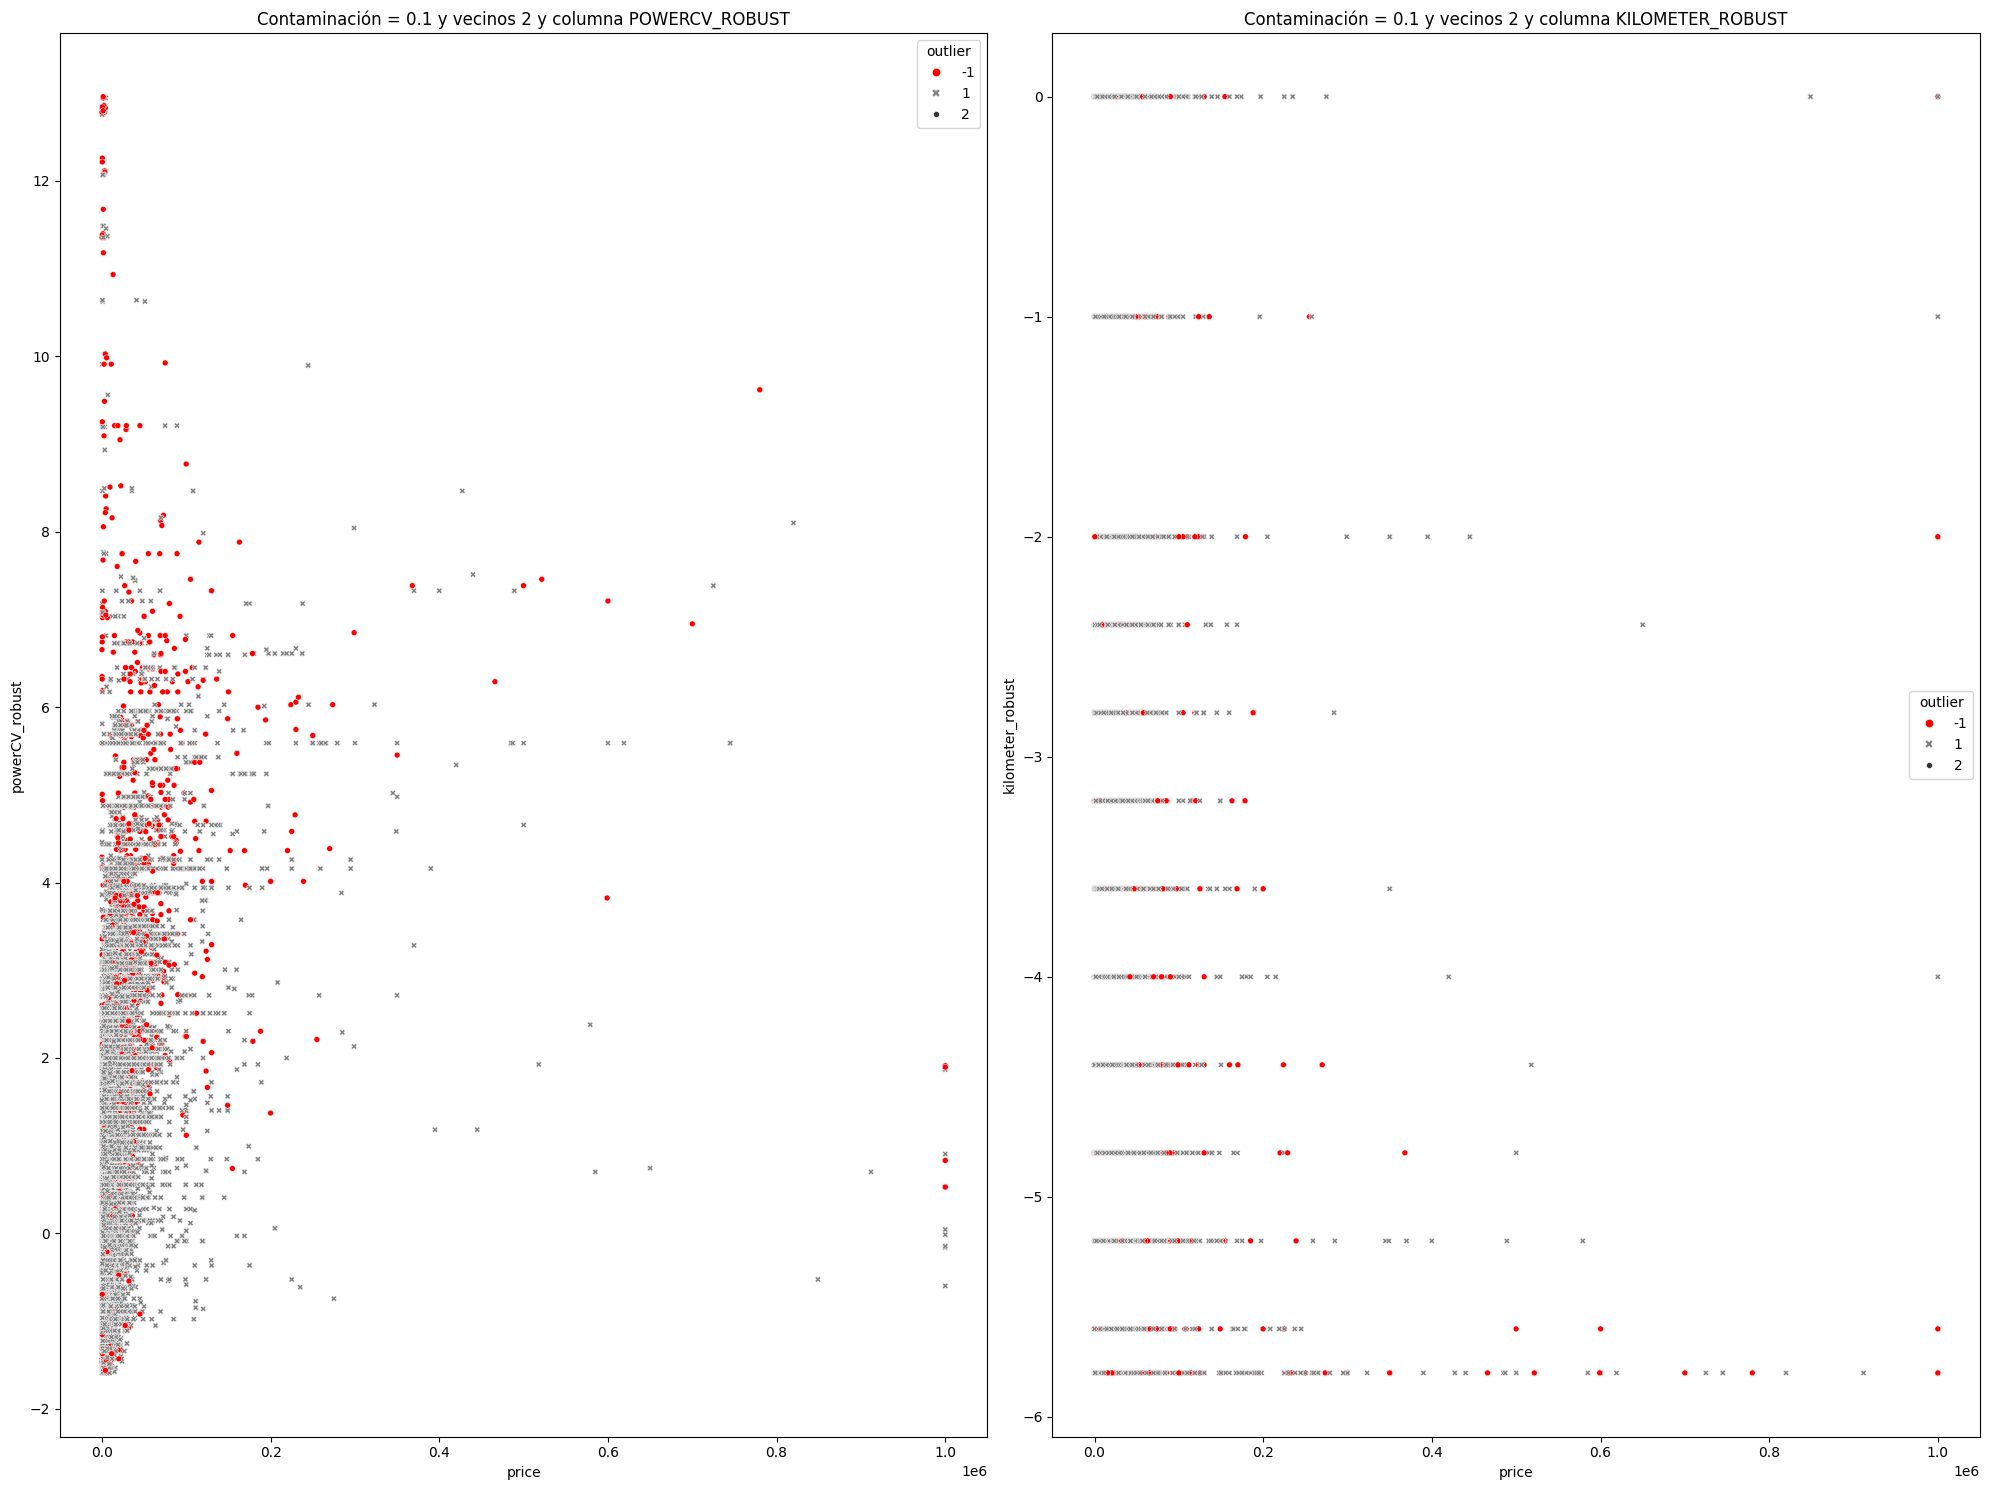

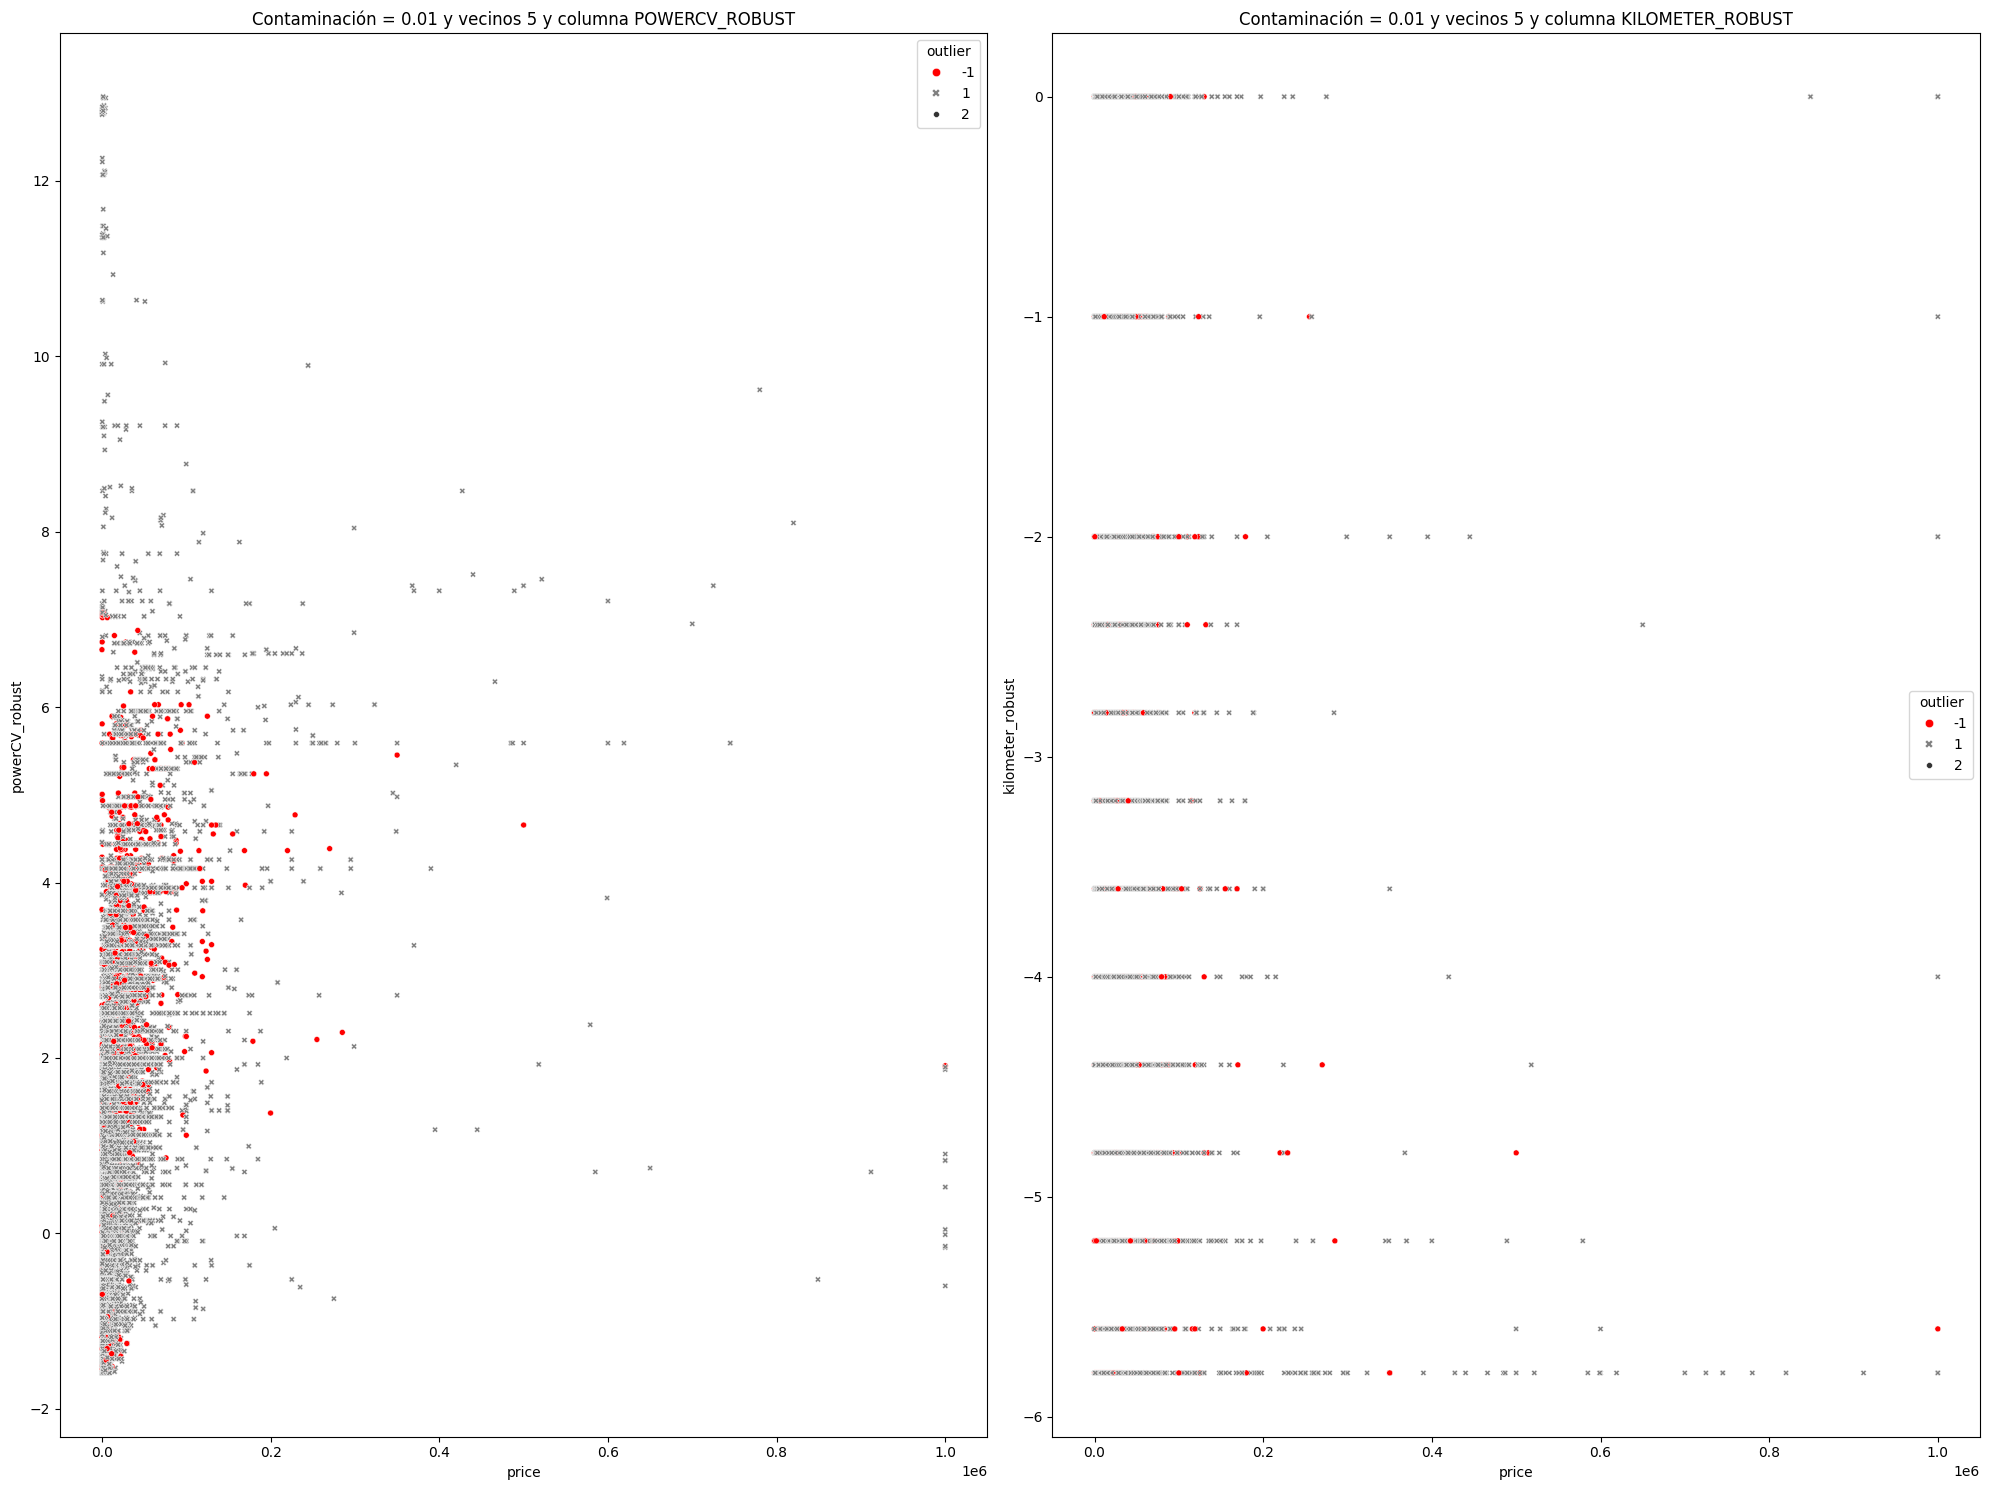

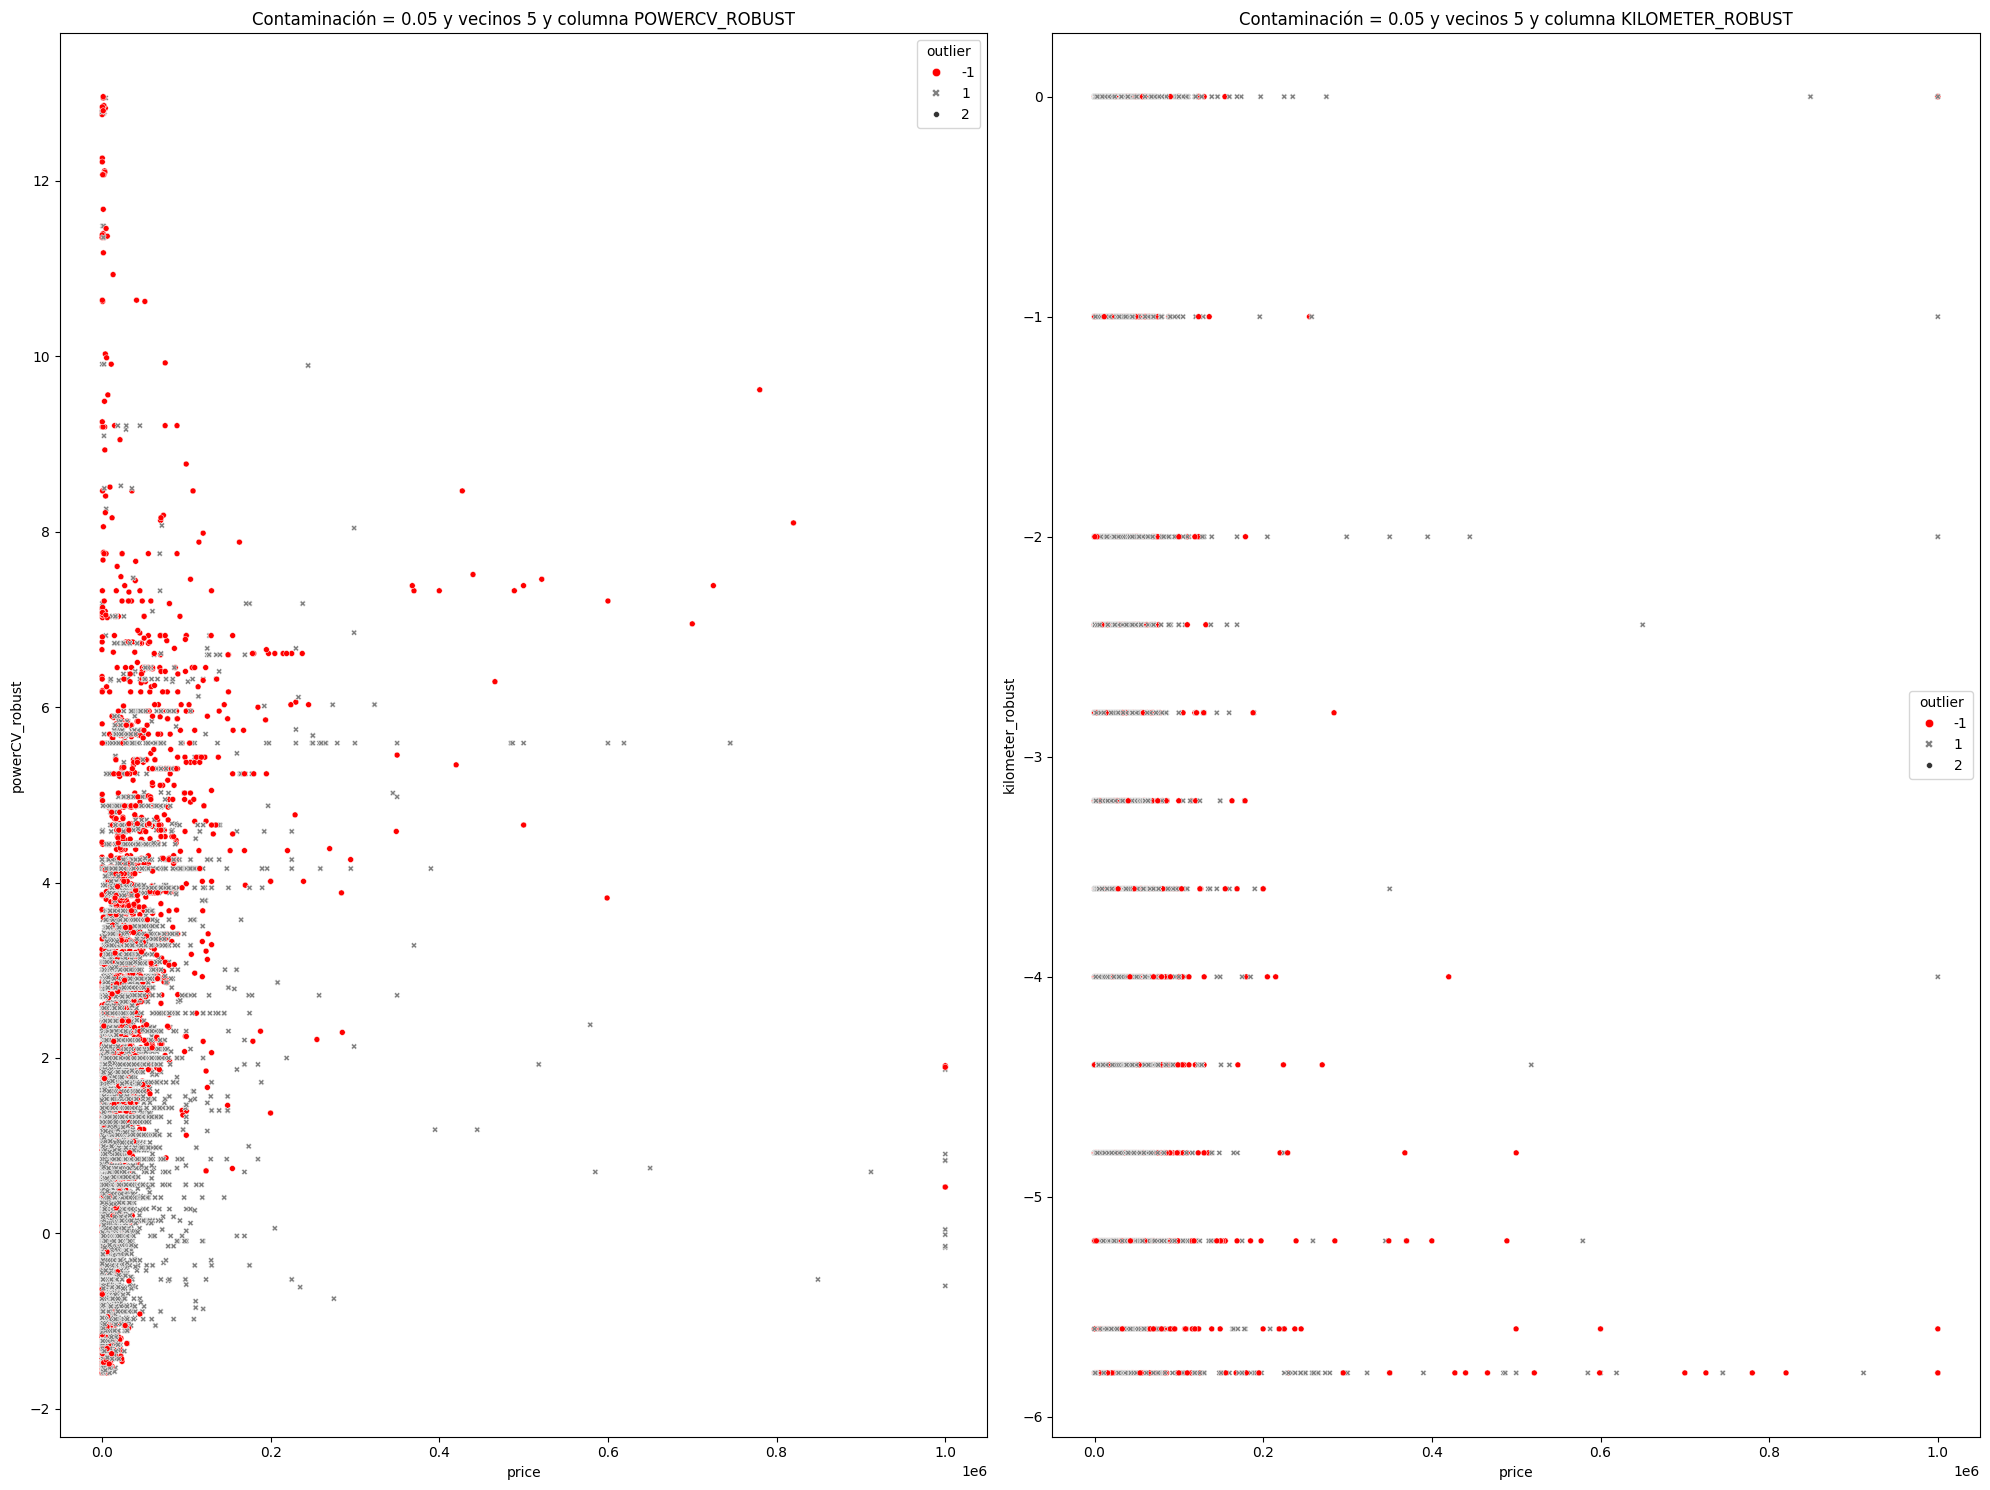

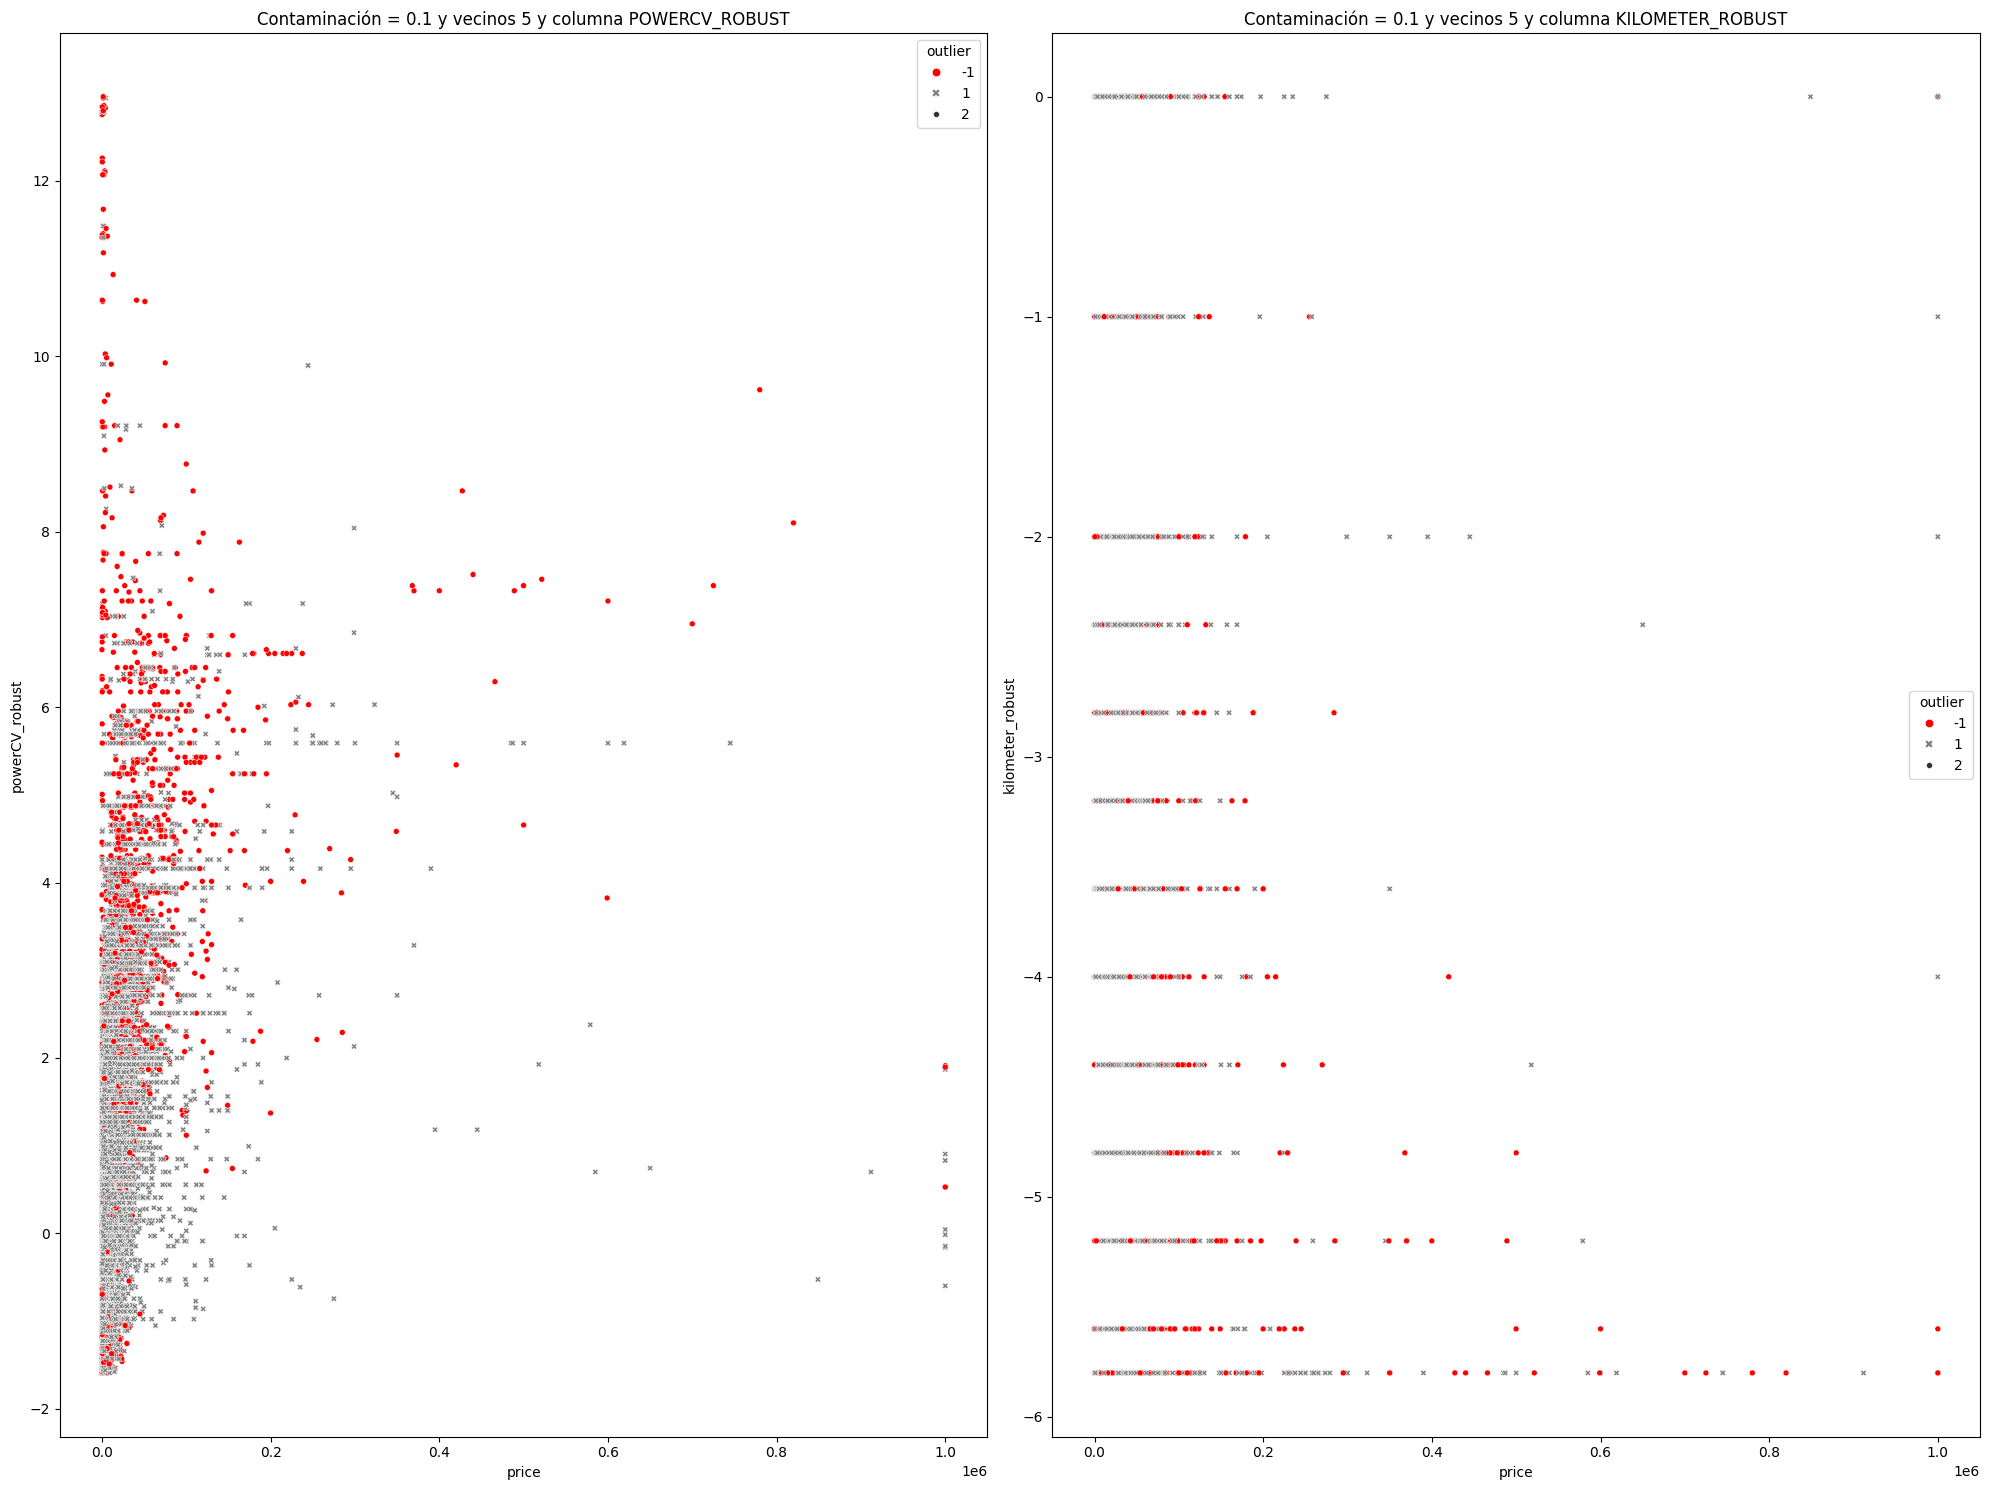

In [9]:
gestion_multi.explorar_outliers_lof("price")

Dada la naturaleza hasta cierto punto "relativa" del método, no podemos asegurar que esta estimación de ouliers sea la mejor.

Veamos que información nos aporta el metodo Isolation Forest, lo hacemos para 5 iteraciones

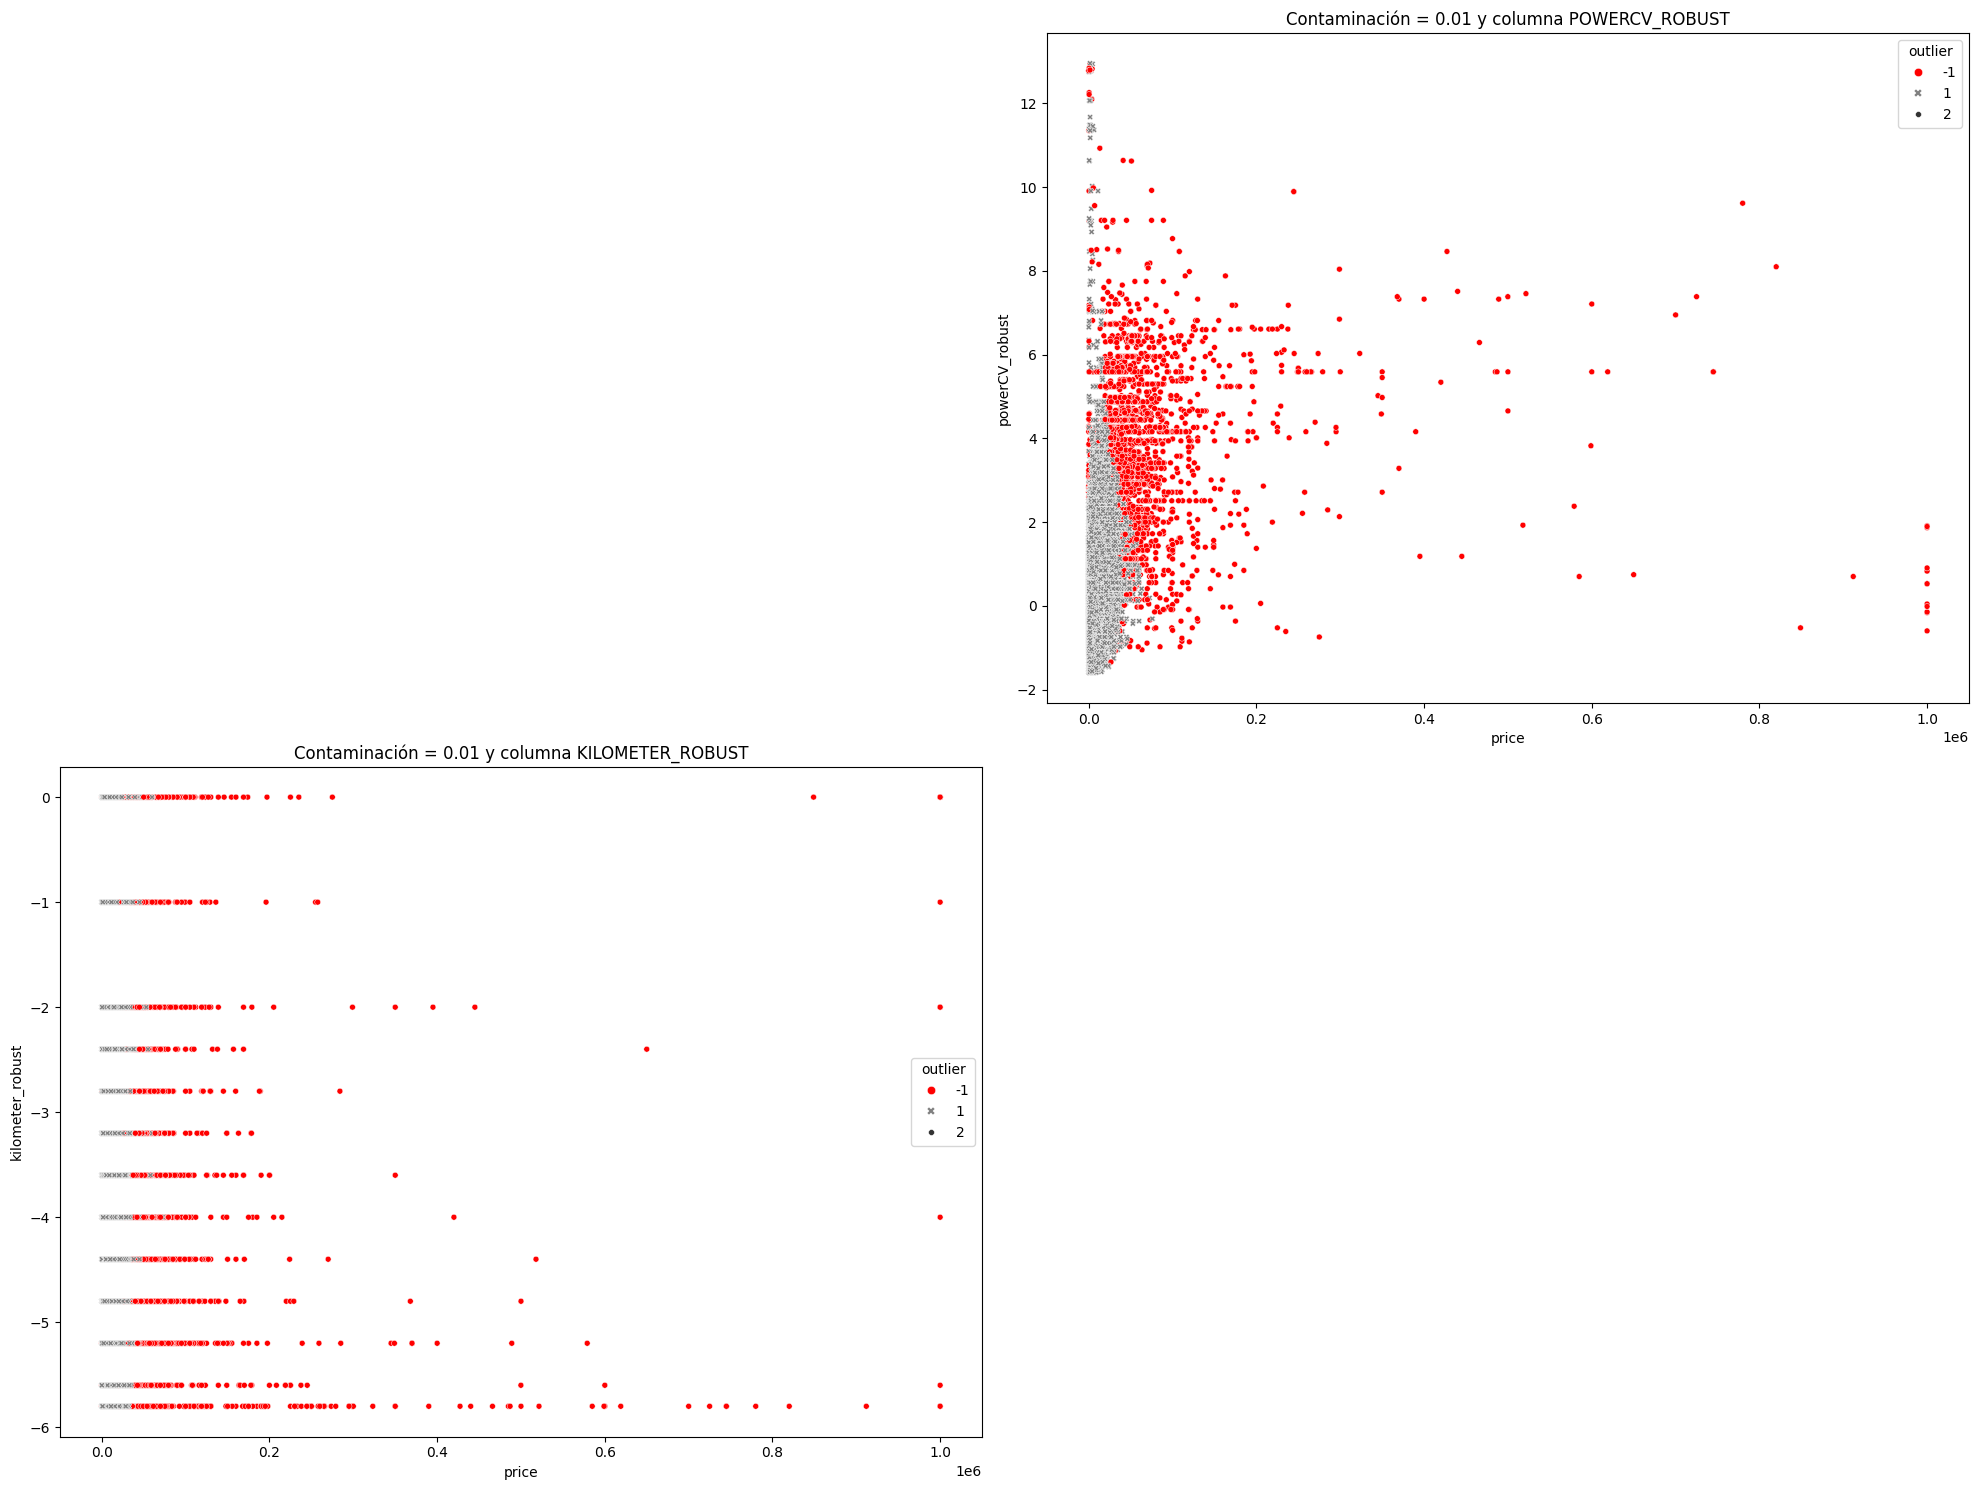

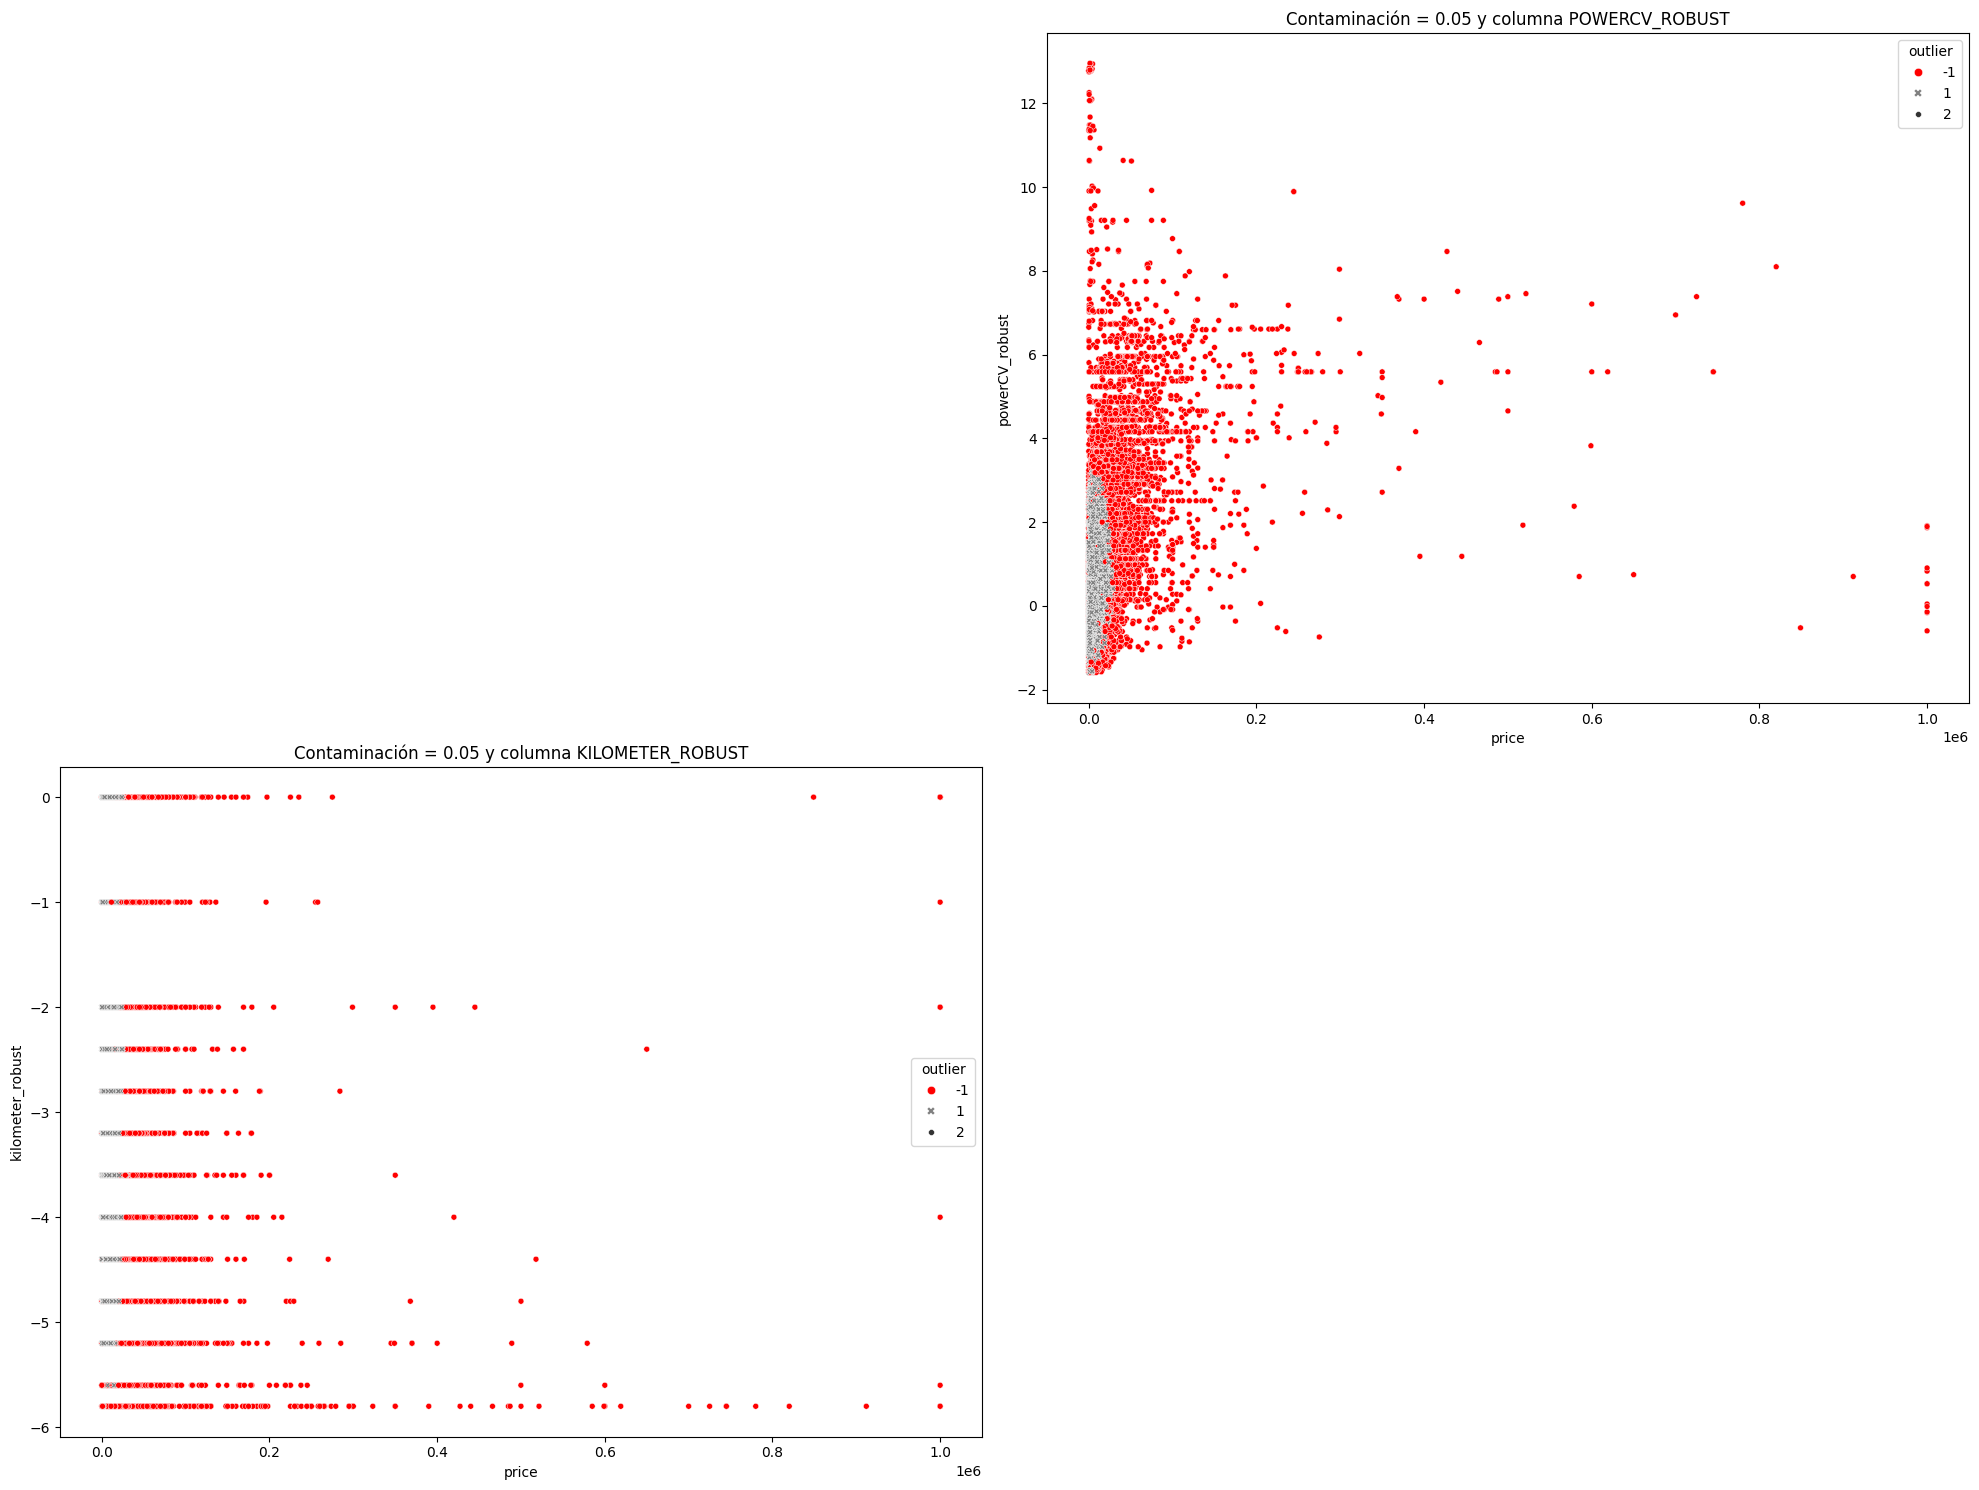

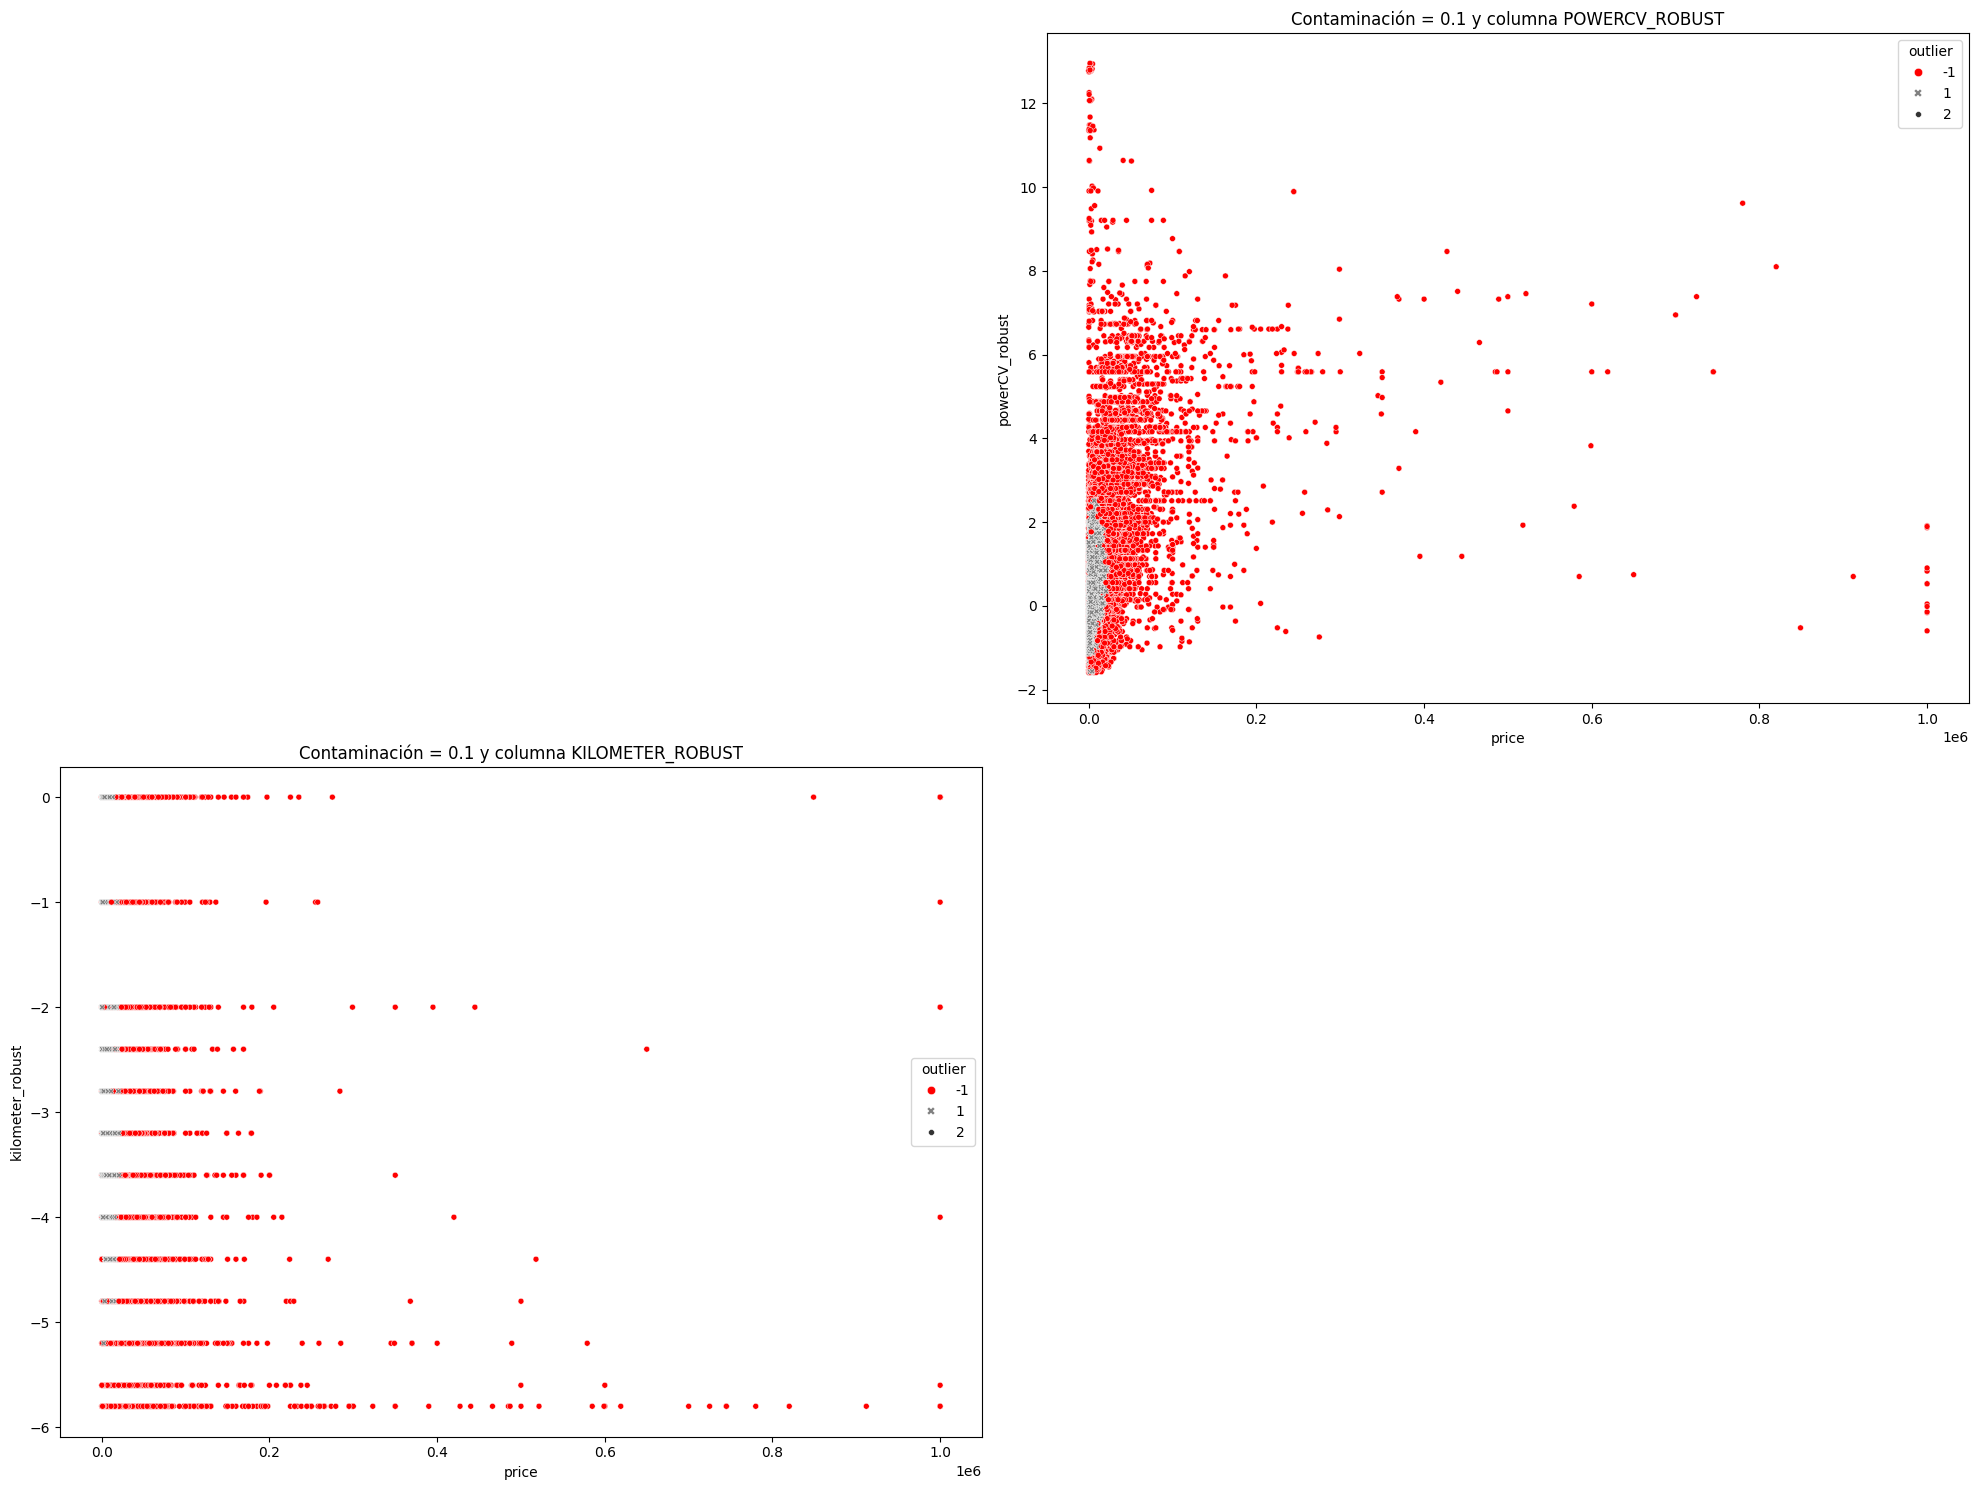

In [11]:
gestion_multi.explorar_outliers_if("price")

Este metodo marca demasiados outliers para cualquier nivel de contaminación. Lo vamos a descartar y seguiremos con el LOF modificando el numero de vecinos. A parte de 2 y 5 vamos a añadir 10 vecinos.

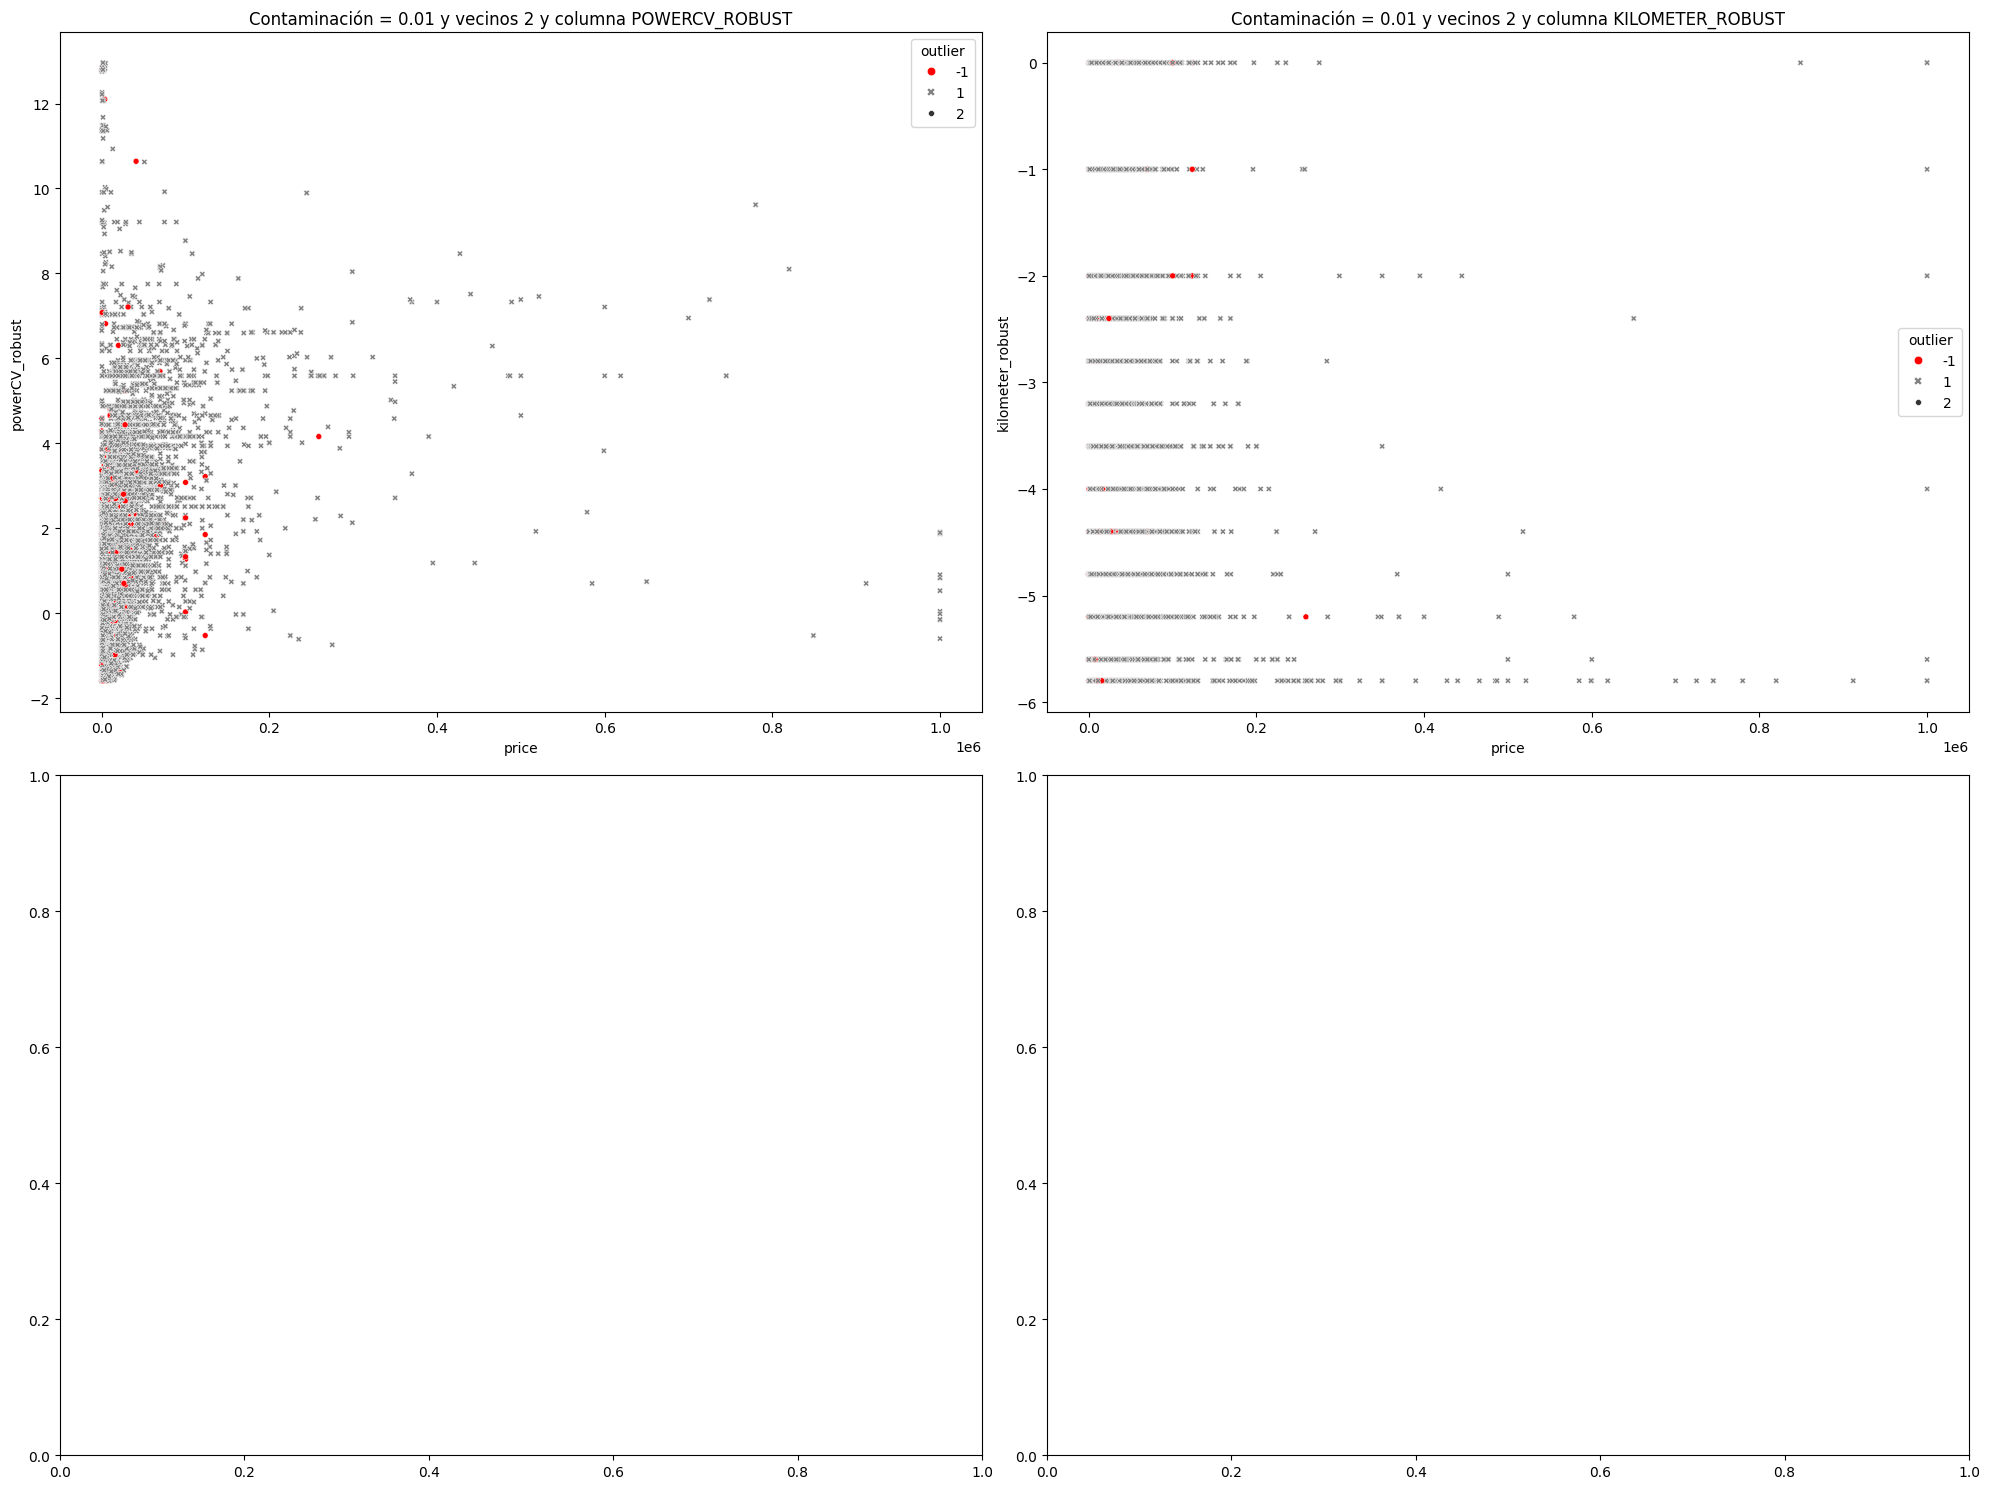

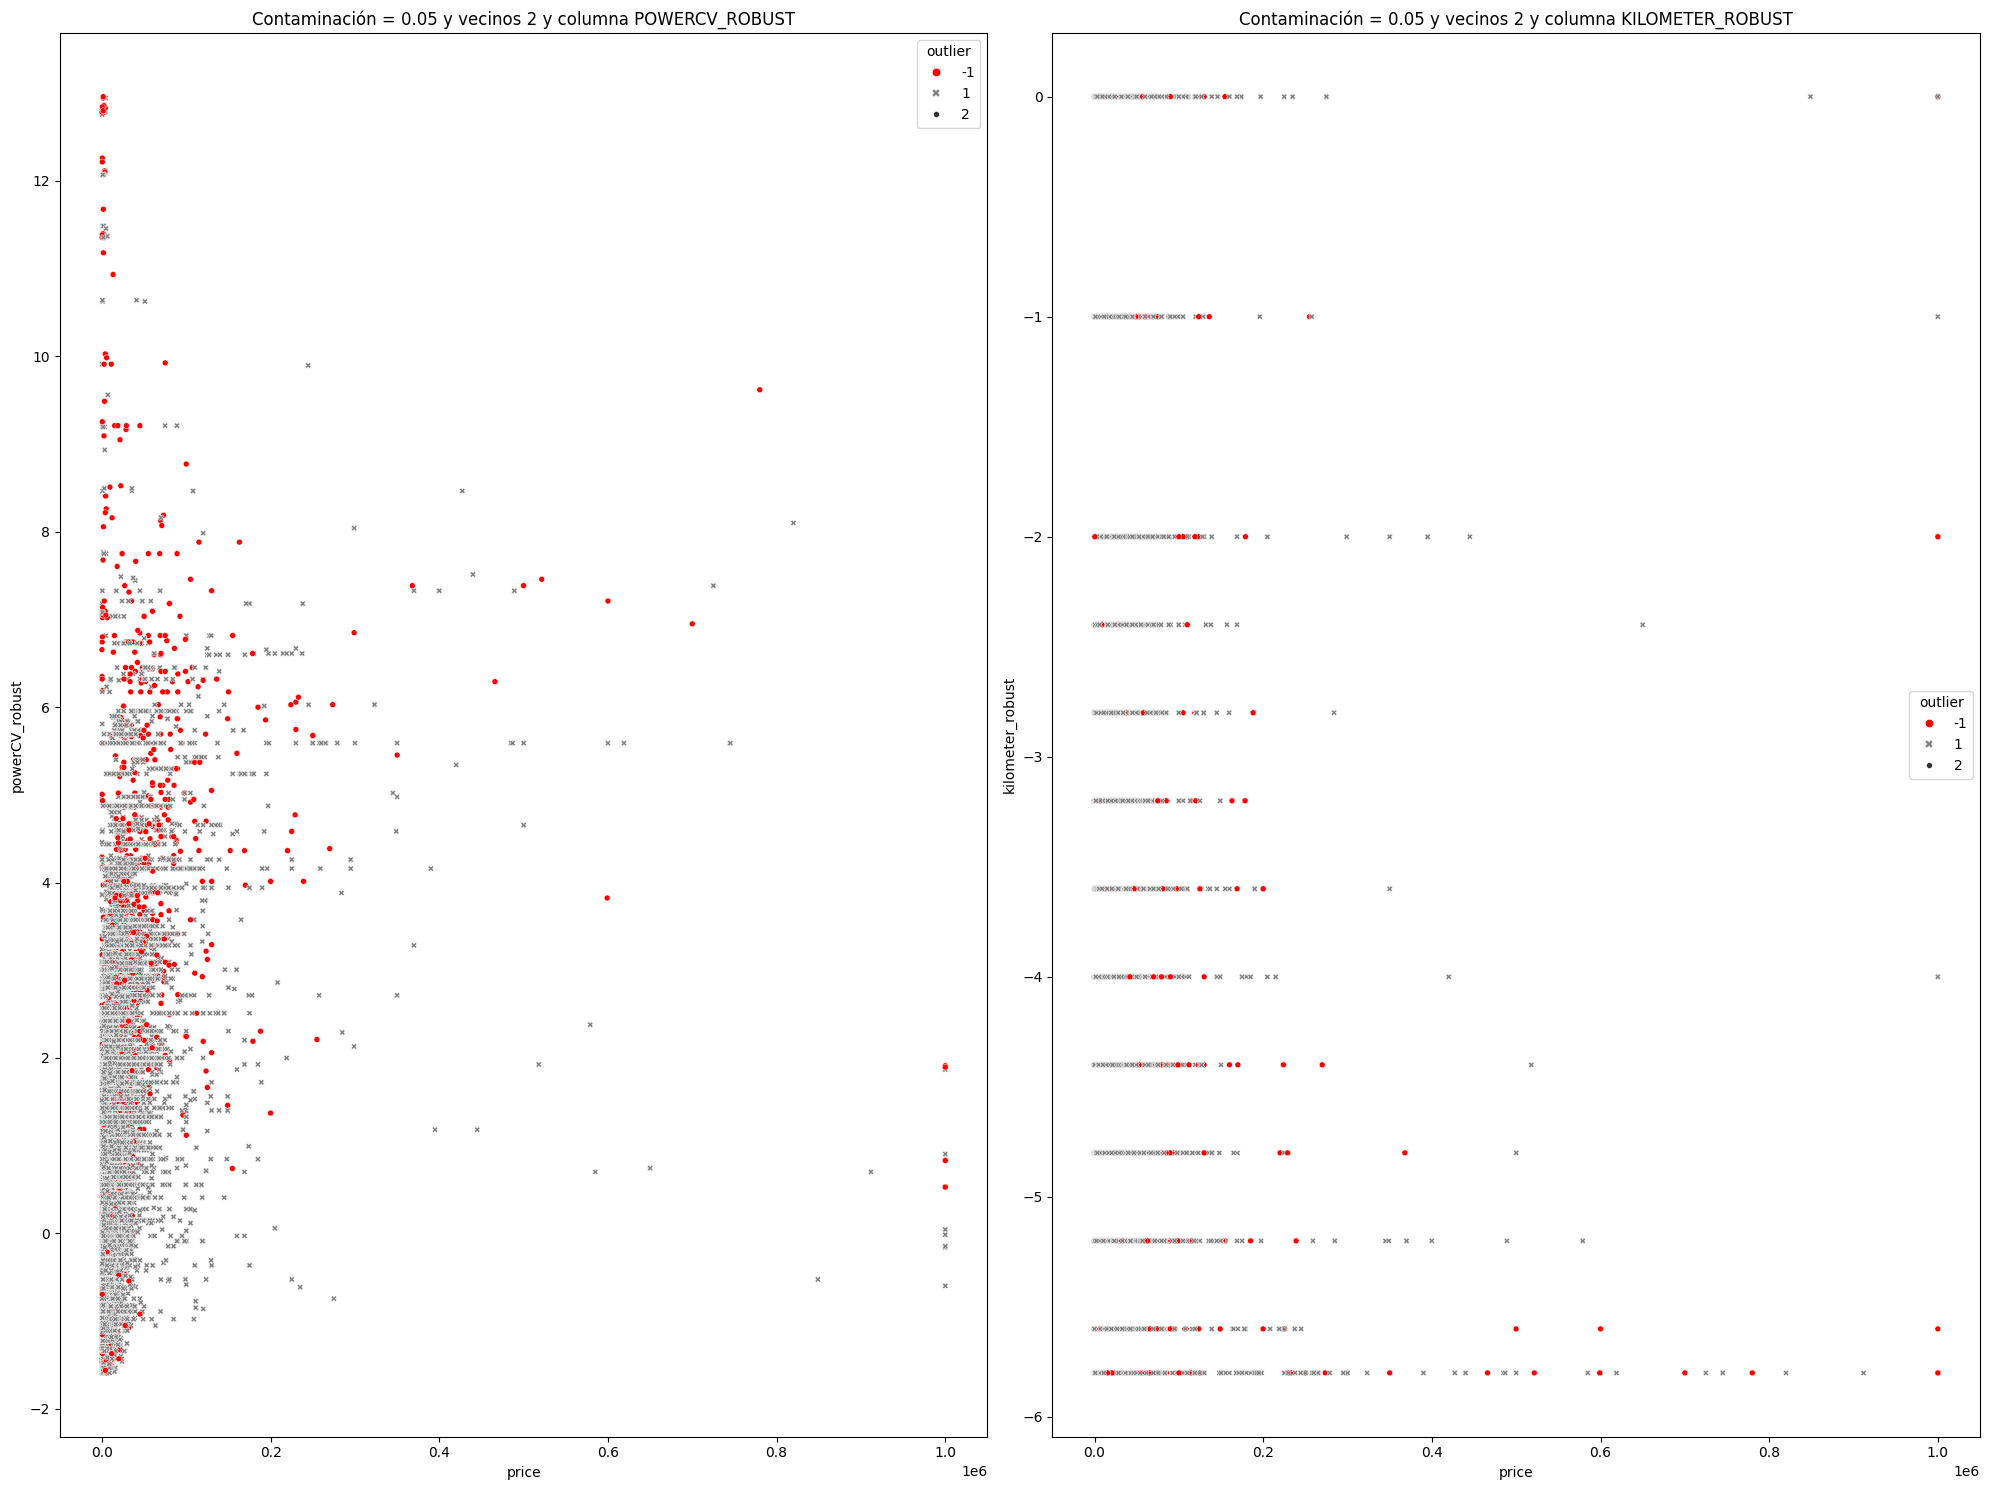

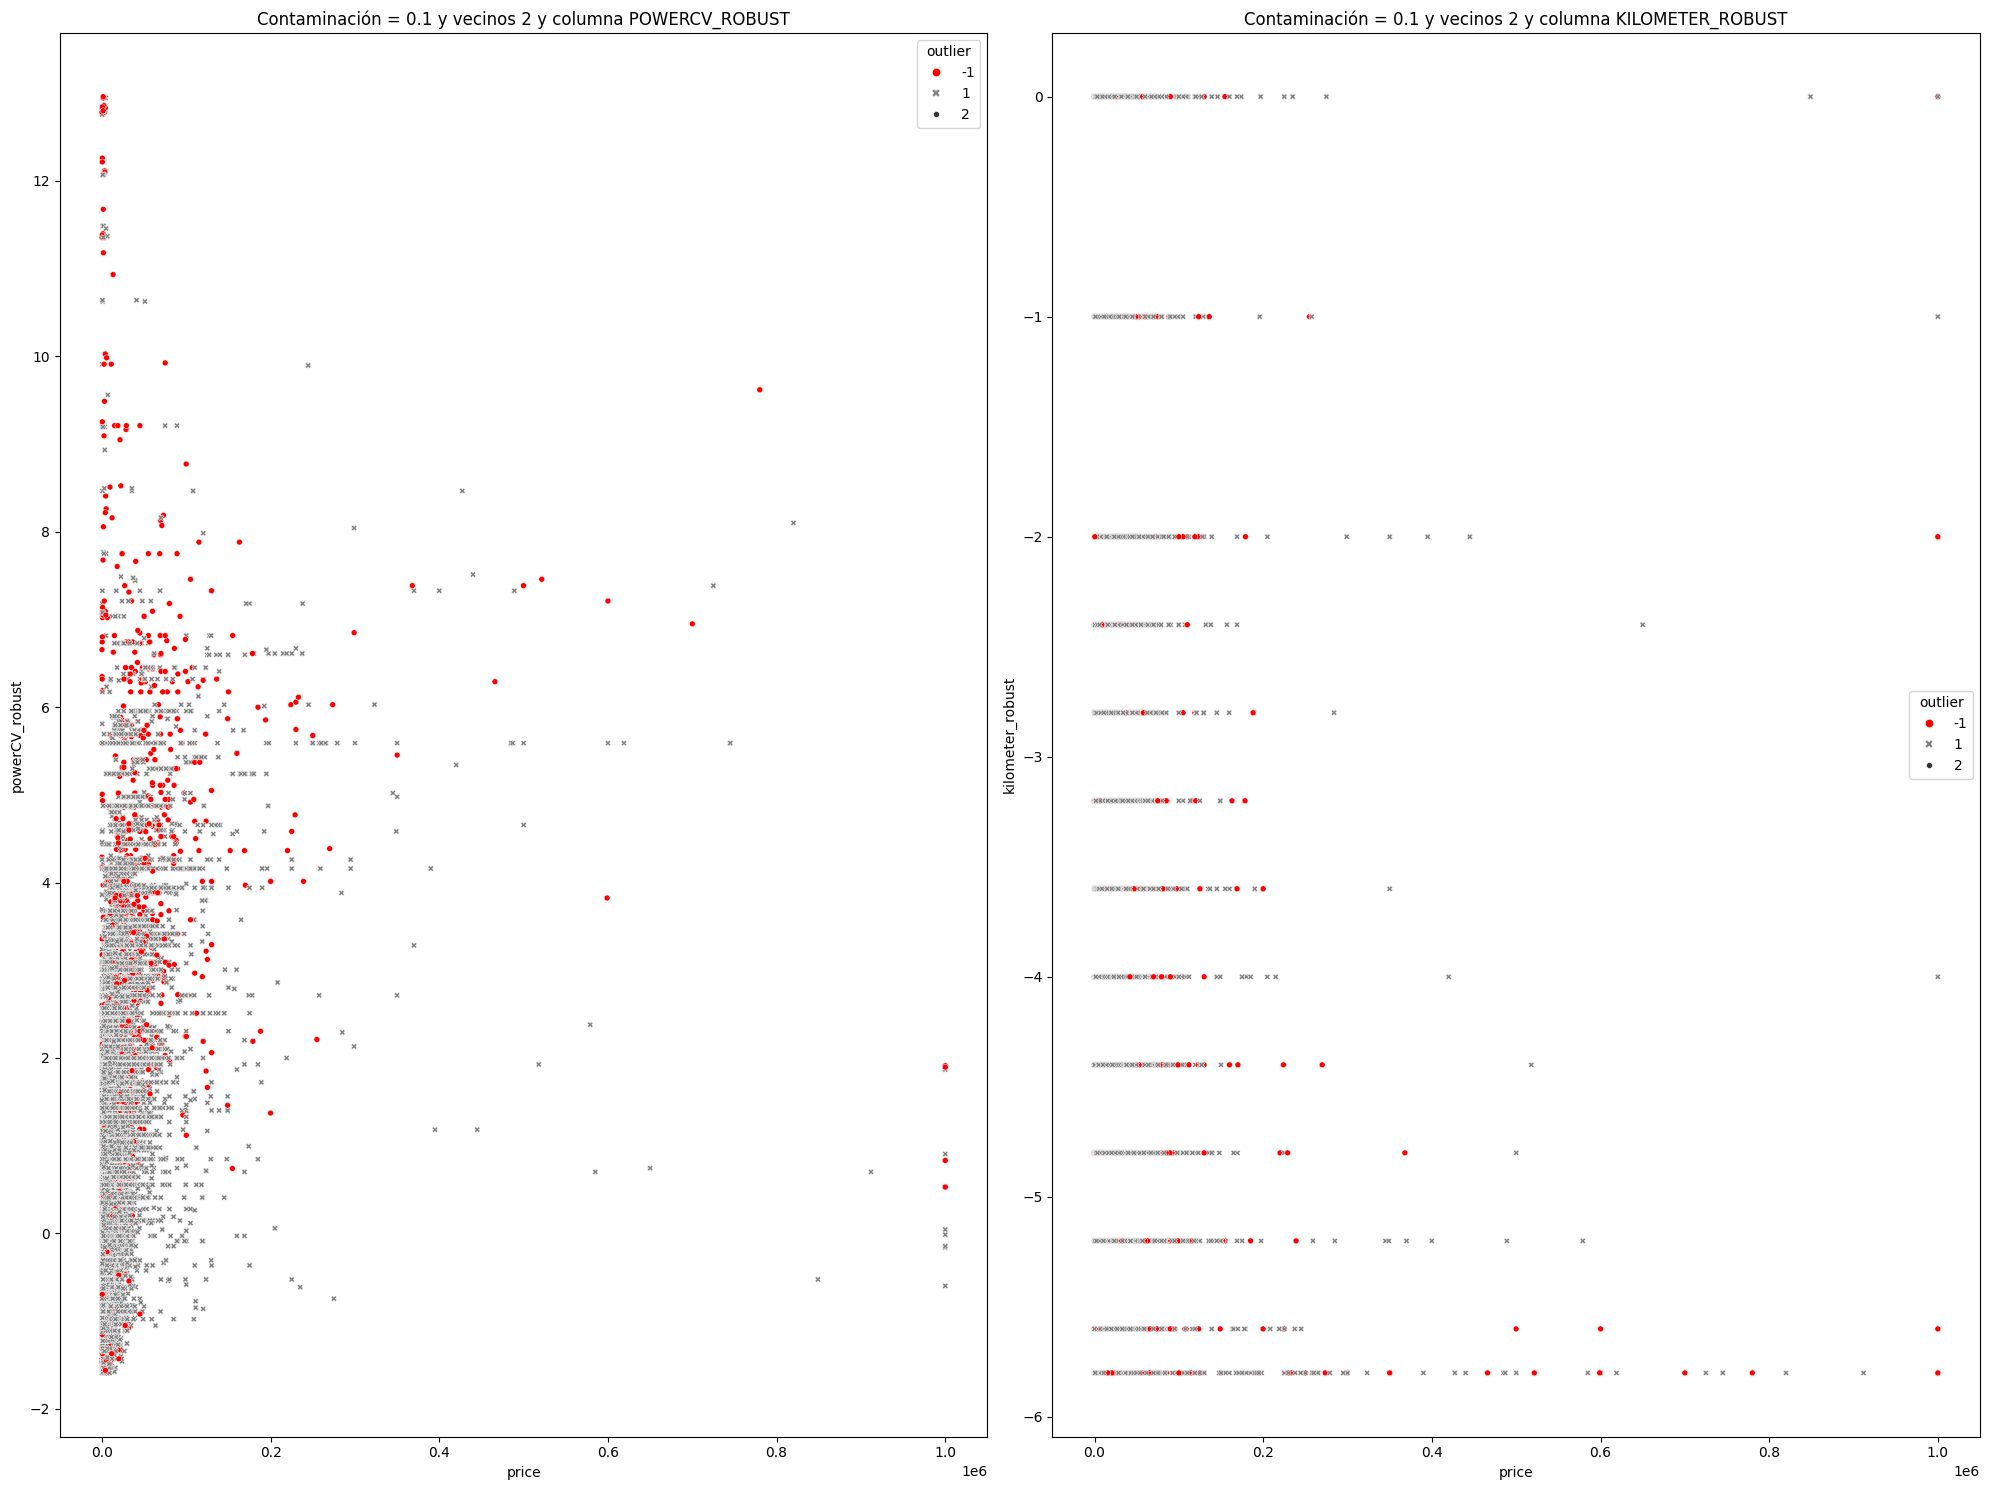

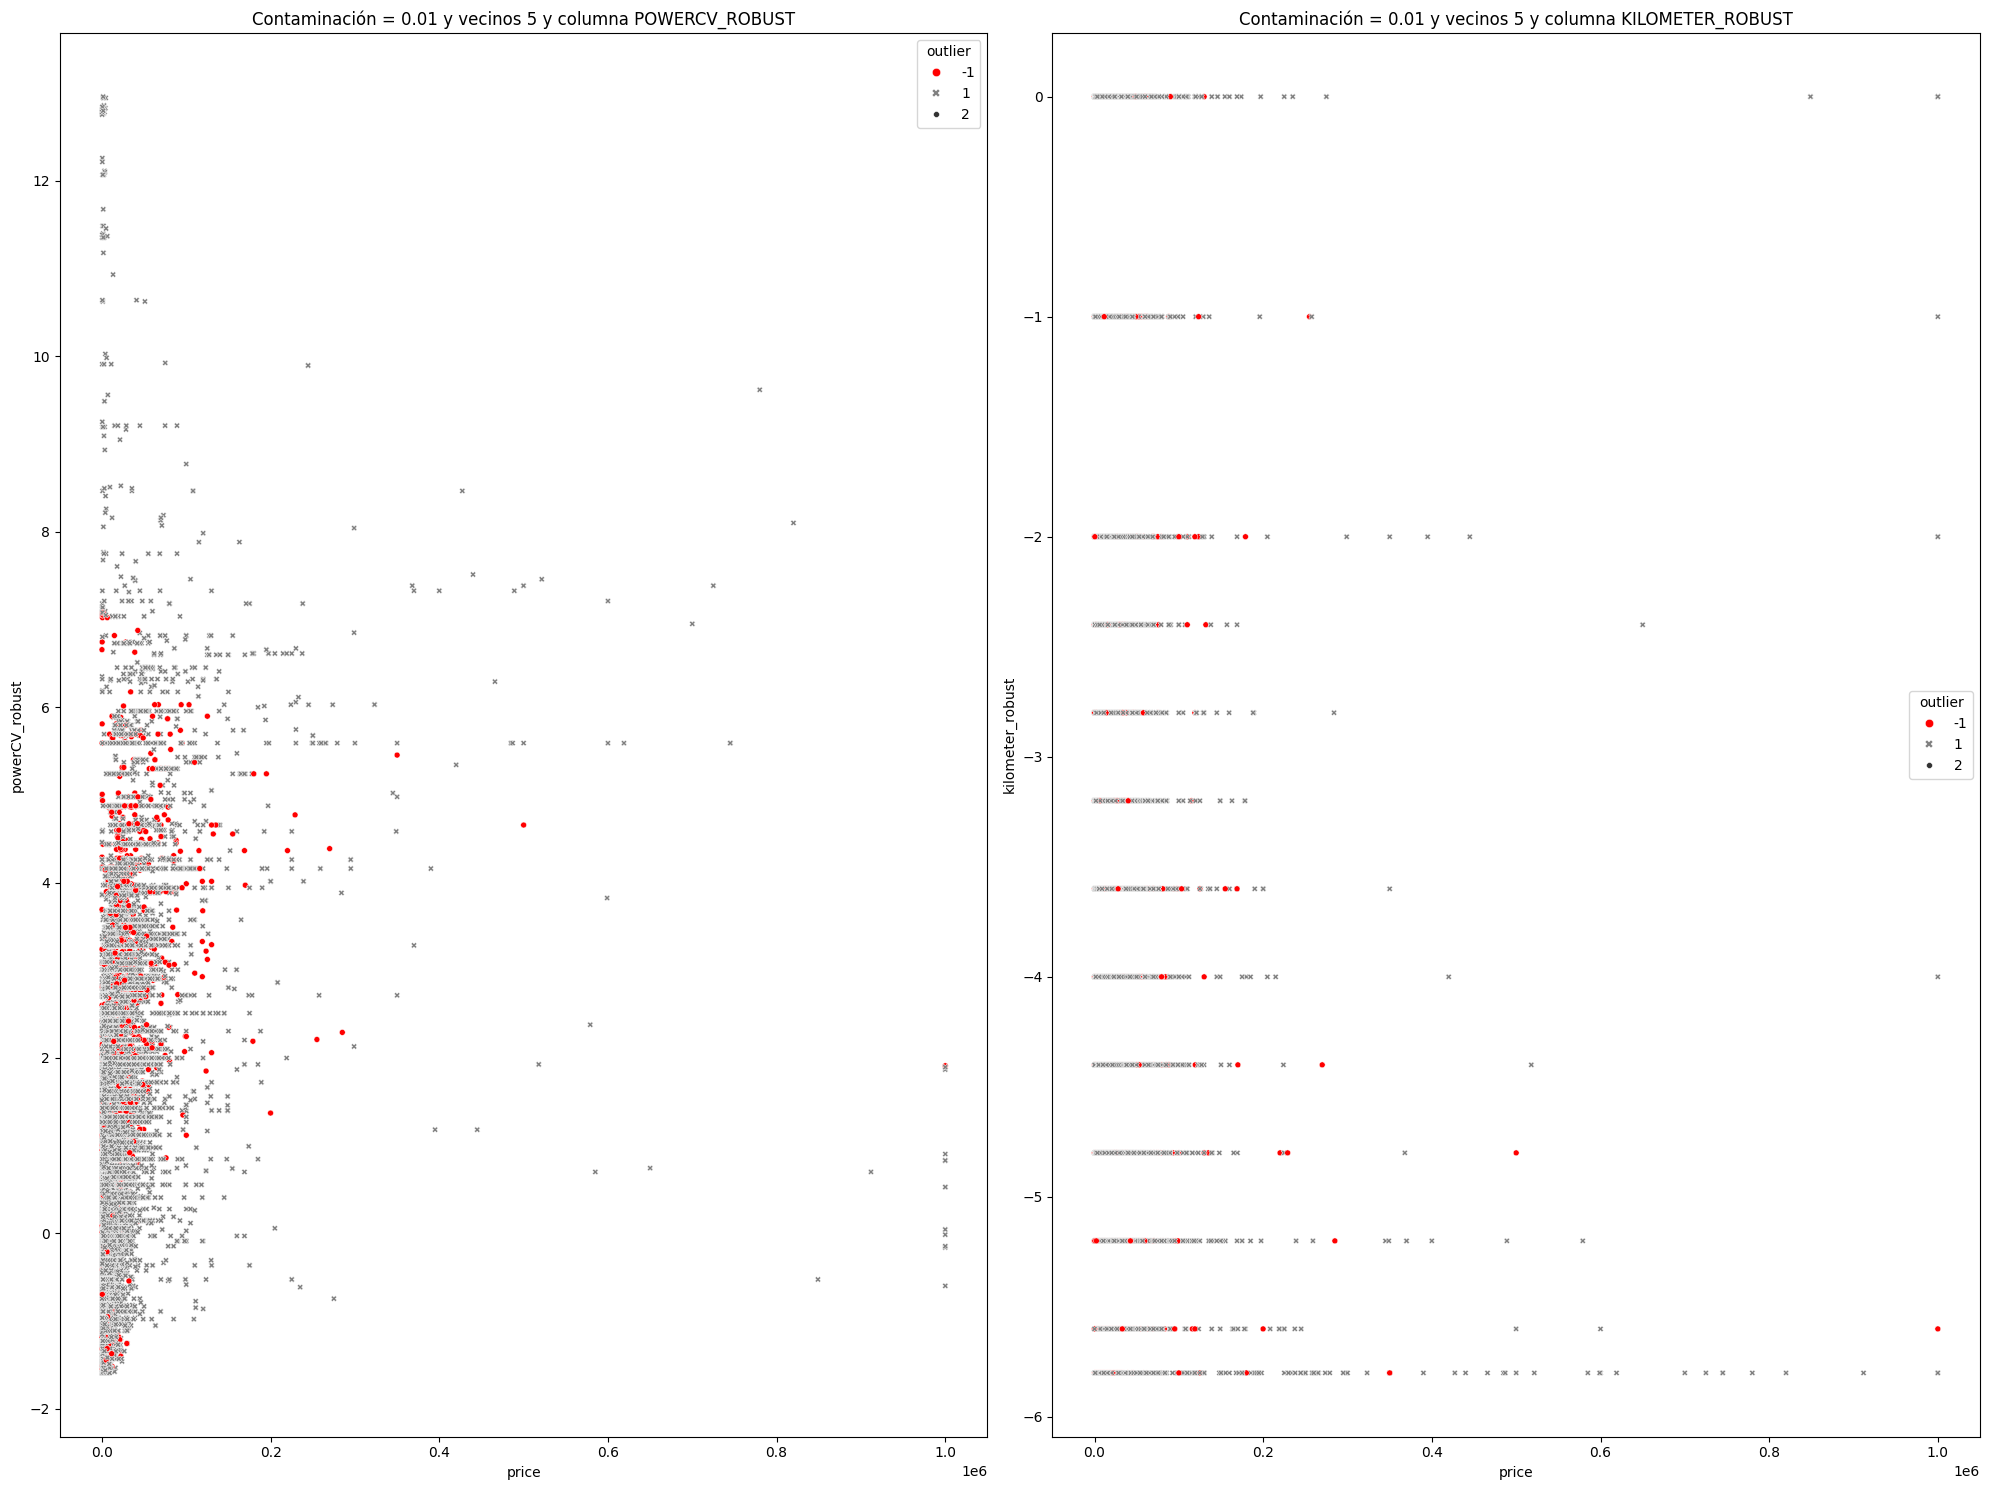

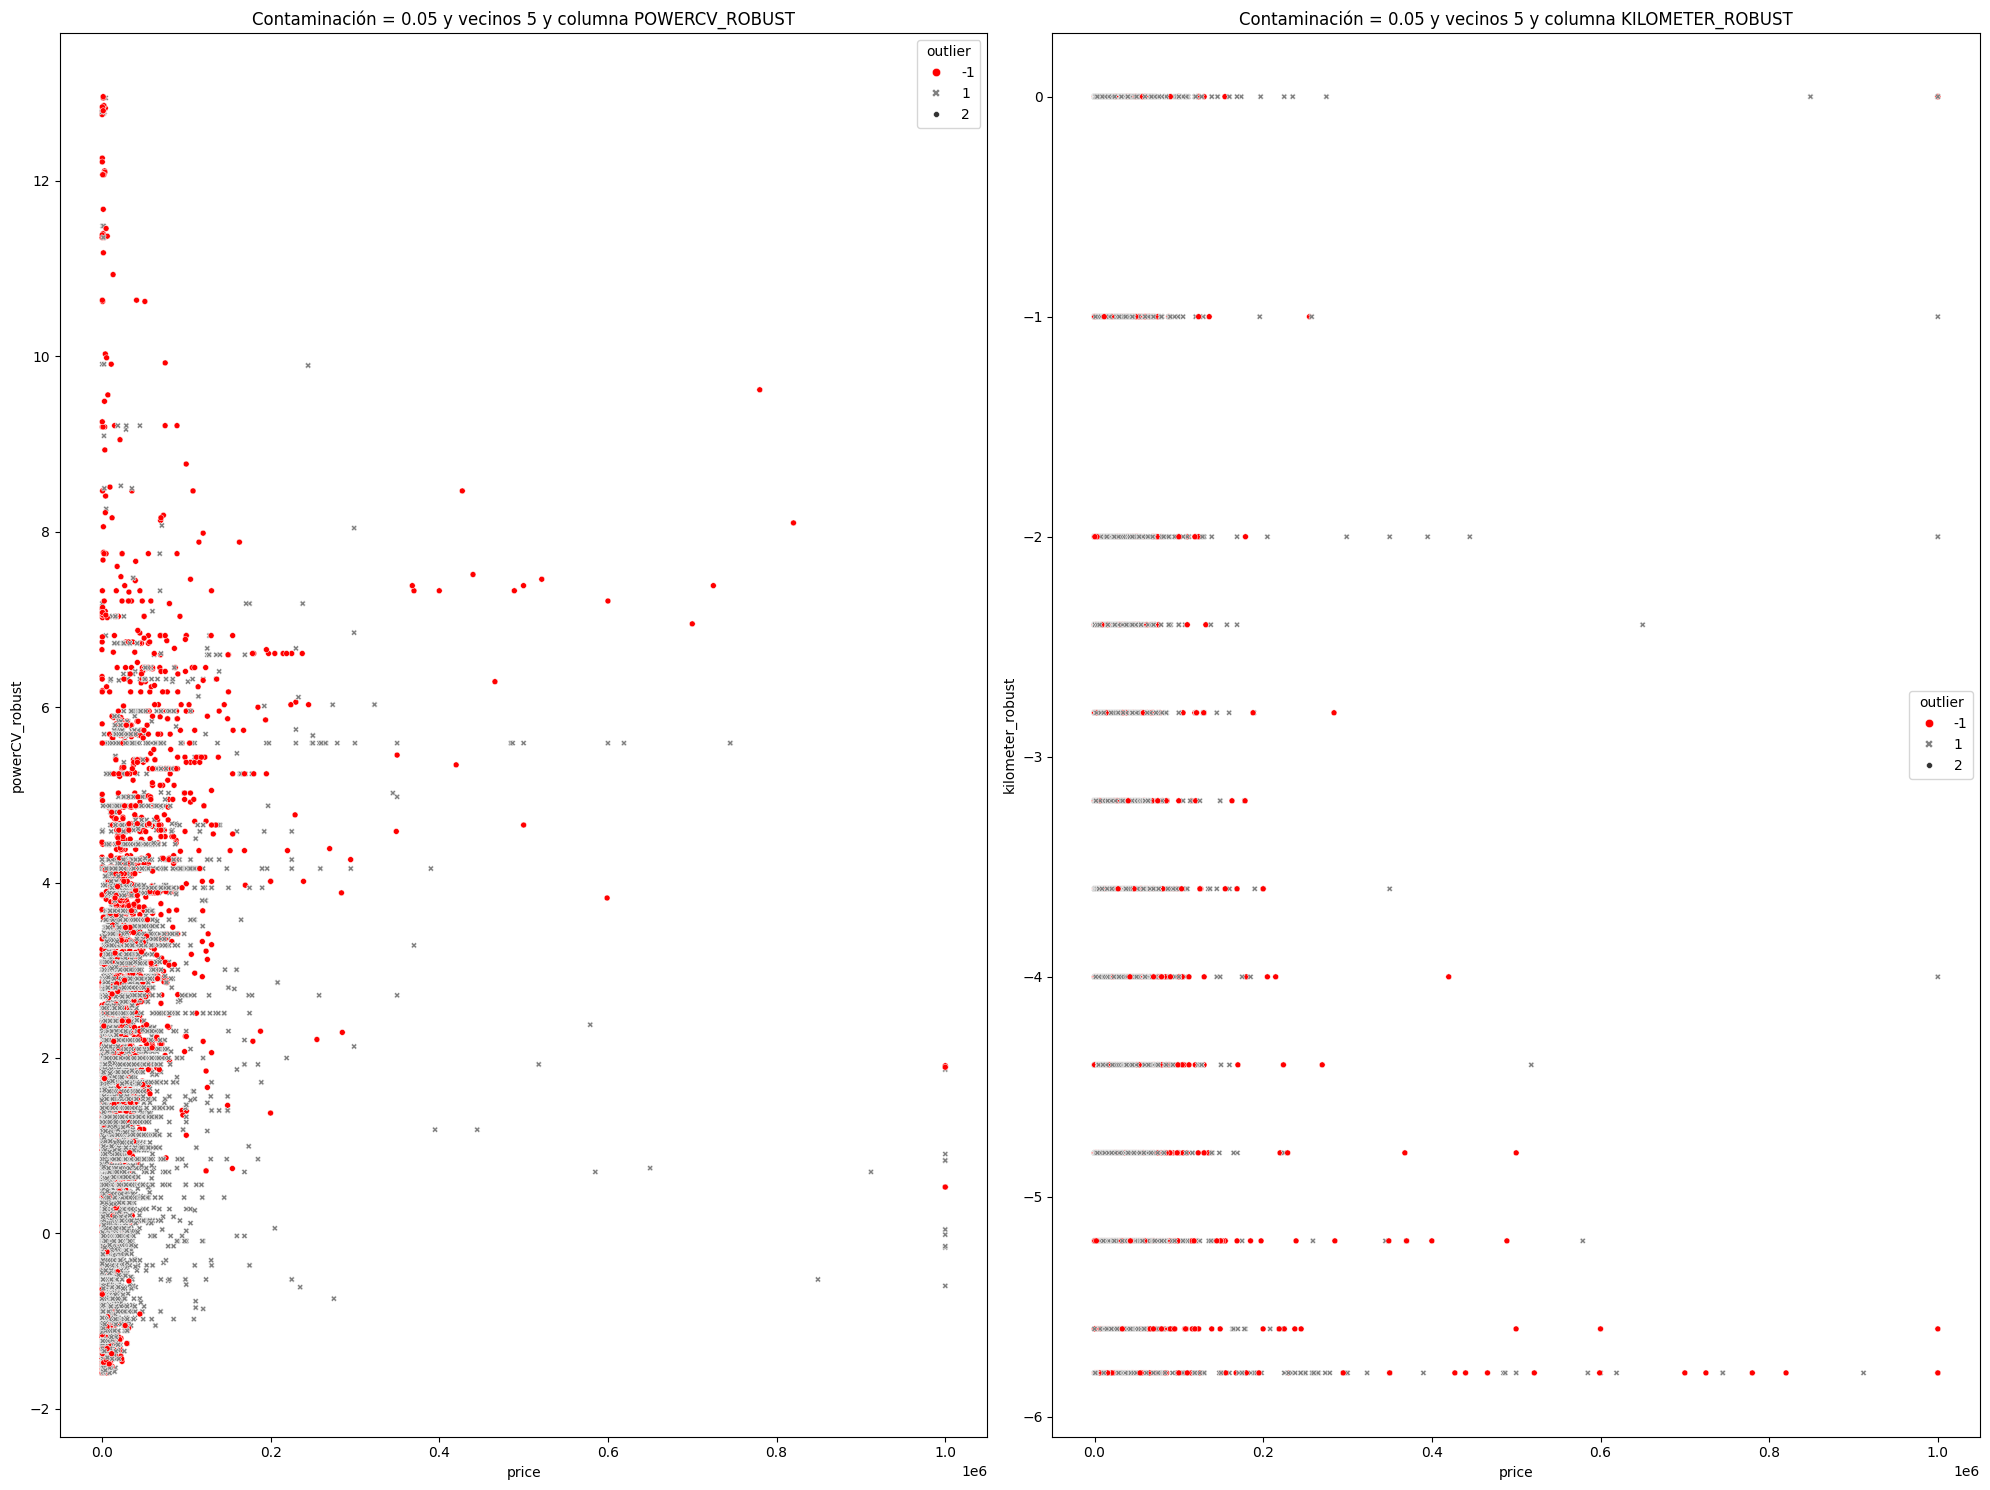

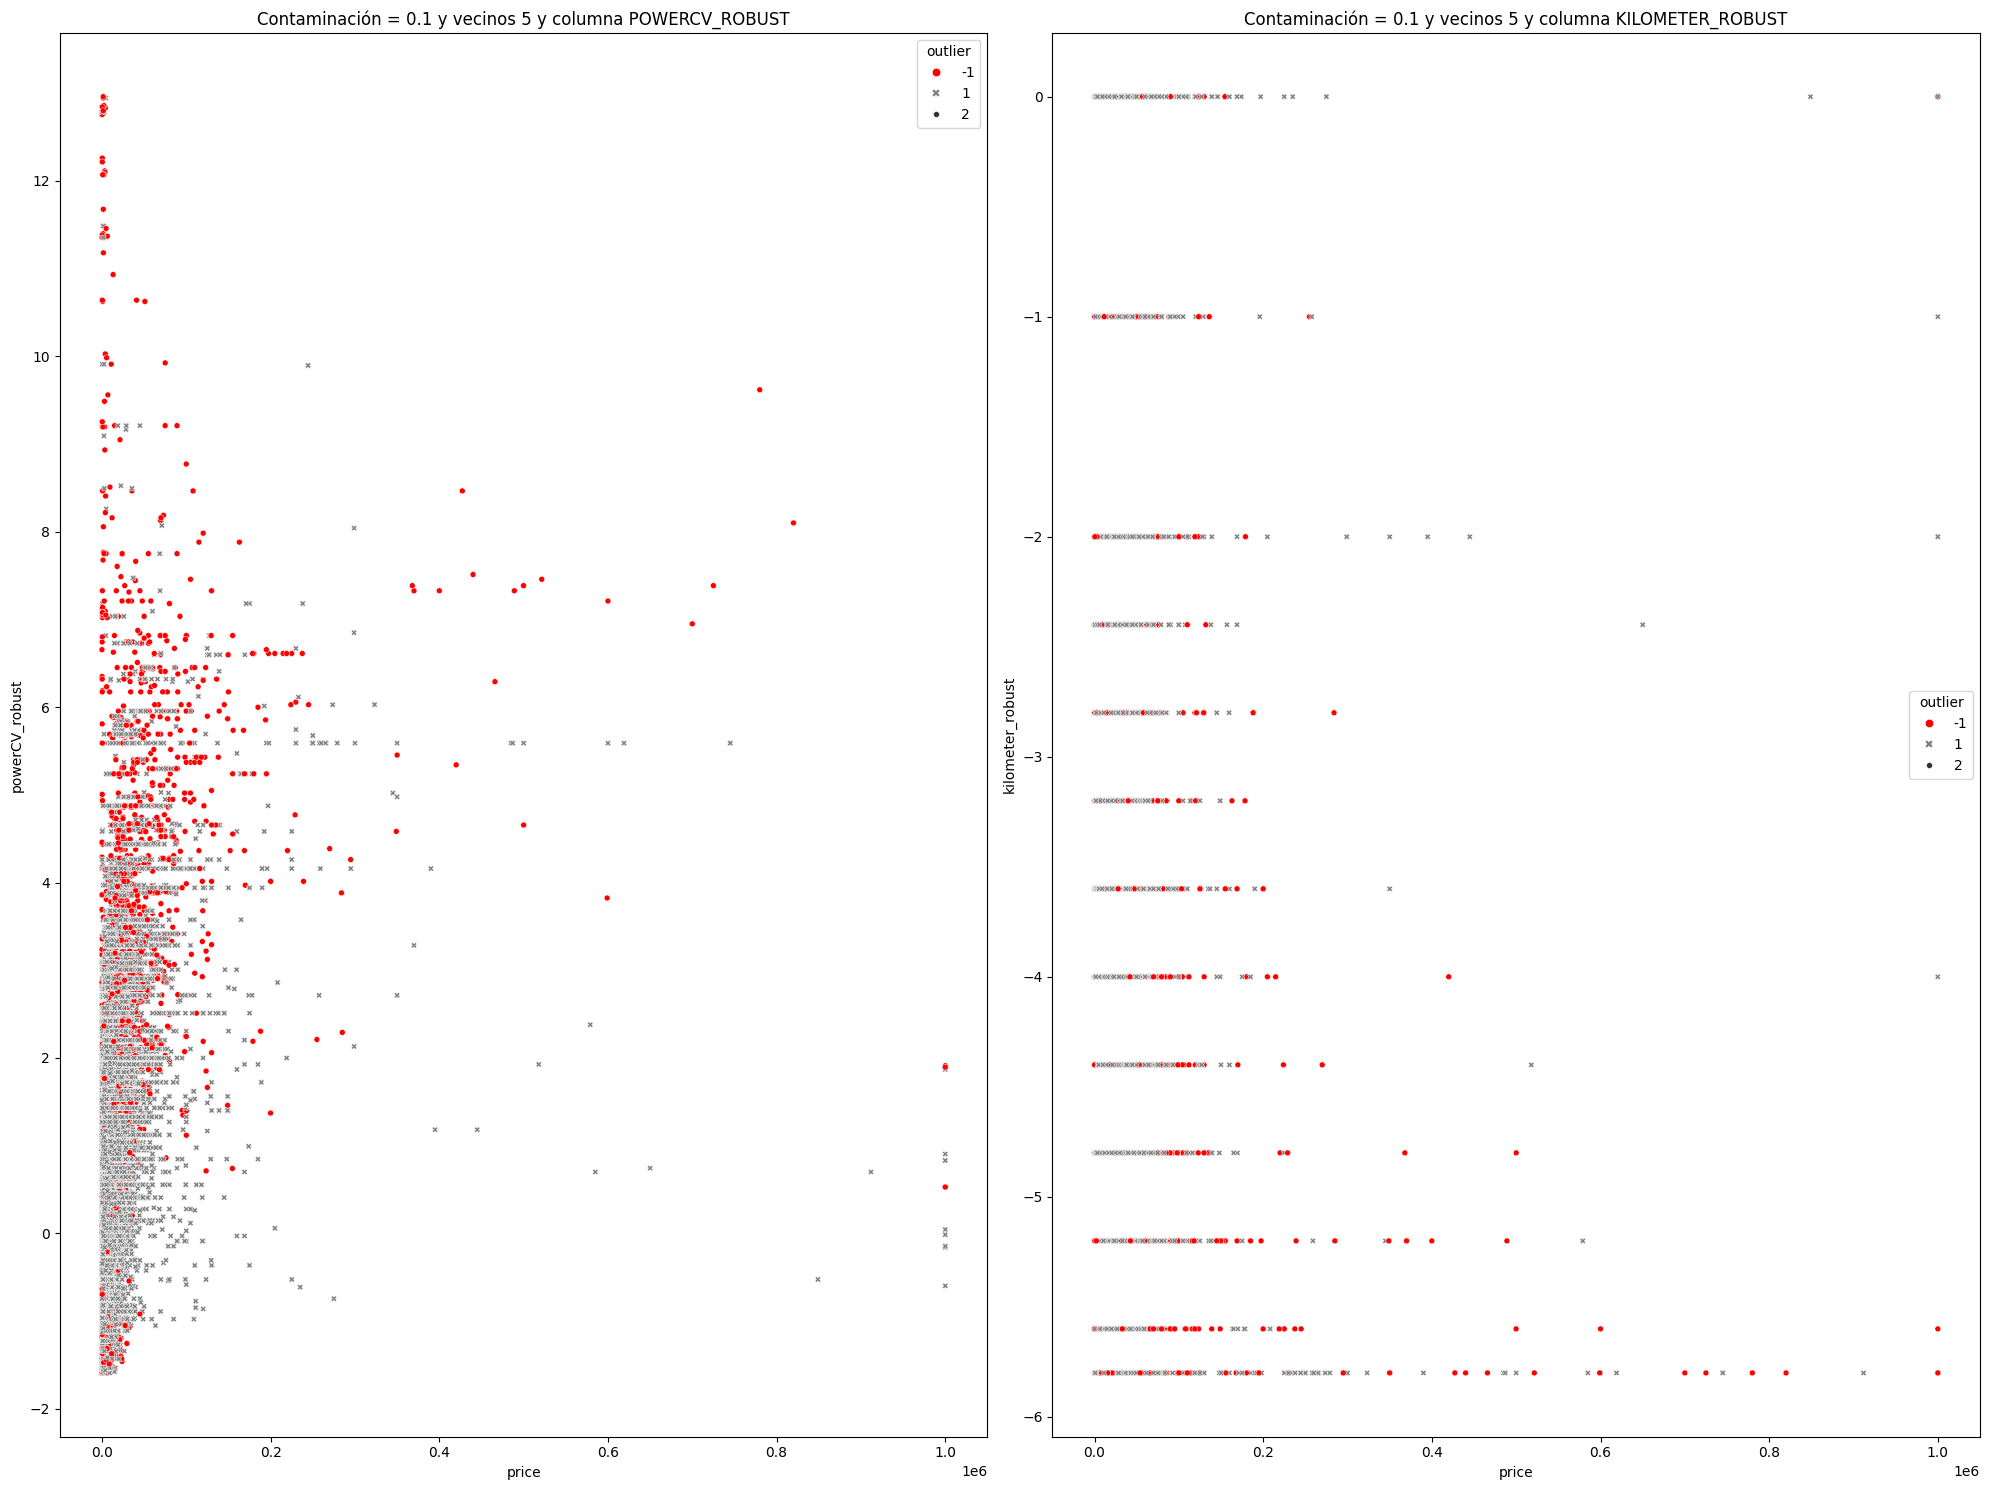

In [12]:
gestion_multi.explorar_outliers_lof("price")